프로젝트 샘플
http://naver.me/50oquHxy

# 여성 의류 사이즈 기준 및 상품 추천 시스템 모델 개발

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import selenium
import requests

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from urllib import request
from urllib.request import urlopen, urlretrieve
from urllib.parse import quote_plus

## 1) 상의 (긴팔 티셔츠) - 크롤링

In [4]:
#'https://www.musinsa.com/app/'
url = 'https://www.musinsa.com/categories/item/001010?d_cat_cd=001010&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page=1&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<script type="text/javascript">
        var dataLayer = dataLayer || [];
    </script>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
            new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
        j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
        'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-TXDSFSF');</script>
<!-- End Google Tag Manager -->
<script>
        dataLayer.push({
            mainInfo: {
                'email': ""
            }
        });
    </script>
<title>상의 &gt; 긴소매 티셔츠 | 무신사 스토어</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no, viewport-fit=cover" name="viewport"/>
<meta content="총 1719개 브랜드와 반소매 티셔

#### * 상품명 & 링크 추출

In [5]:
##searchList > li:nth-child(1) > div.li_inner > div.article_info > p.list_info > a
soup.select(selector = 'p.list_info > a')

[<a href="//www.musinsa.com/app/goods/2149254" name="goods_link" title="베이식 긴팔 티셔츠 2팩">
                   
                   
                   
                   
                   베이식 긴팔 티셔츠 2팩
                 </a>,
 <a href="//www.musinsa.com/app/goods/404474" name="goods_link" title="[패키지 상품] Longsleeve 무지 긴팔티">
                   
                   
                   
                   
                   [패키지 상품] Longsleeve 무지 긴팔티
                 </a>,
 <a href="//www.musinsa.com/app/goods/1144989" name="goods_link" title="베이식 긴팔 티셔츠 [화이트]">
                   
                   
                   
                   
                   베이식 긴팔 티셔츠 [화이트]
                 </a>,
 <a href="//www.musinsa.com/app/goods/407067" name="goods_link" title="하이 벤트 레이어드 티셔츠 [WHITE]">
                   
                   
                   
                   
                   하이 벤트 레이어드 티셔츠 [WHITE]
                 </a>,
 <a href="//www.musinsa.com/app/goods/1265162" name="goo

In [6]:
products = soup.select(selector = 'p.list_info > a')
products[0]['title']
#products[0]['href']

'베이식 긴팔 티셔츠 2팩'

#### * 각 상품별 사이트만 모아서 리스트로 만들고, for 문 돌려서 사이트 접속하여 사이즈표 읽어오기

In [7]:
#1페이지만 추출
for product in products:
    print(product['title'], ':', product['href'])

베이식 긴팔 티셔츠 2팩 : //www.musinsa.com/app/goods/2149254
[패키지 상품] Longsleeve 무지 긴팔티 : //www.musinsa.com/app/goods/404474
베이식 긴팔 티셔츠 [화이트] : //www.musinsa.com/app/goods/1144989
하이 벤트 레이어드 티셔츠 [WHITE] : //www.musinsa.com/app/goods/407067
[패키지] 에센셜 레이어드 롱 슬리브 티셔츠 : //www.musinsa.com/app/goods/1265162
엔젤 와펜 스트라이프 롱슬리브 블랙 : //www.musinsa.com/app/goods/1322019
[패키지] 더블 코튼 무지 긴팔티 12종 2pack JHL... : //www.musinsa.com/app/goods/1608272
베이식 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1129745
[ONEMILE WEAR] 2PACK SMALL ARCH ... : //www.musinsa.com/app/goods/2058136
우먼즈 릴렉스드 크루 넥 긴팔 티셔츠 [화이트] : //www.musinsa.com/app/goods/1629101
폰테 크루 넥 긴팔 티셔츠 [오프 화이트] : //www.musinsa.com/app/goods/1190264
하이 벤트 레이어드 티셔츠 [BLACK] : //www.musinsa.com/app/goods/407066
[패키지] NYC LOCATION LONG SLEEVE T... : //www.musinsa.com/app/goods/1130844
폰테 크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1190268
우먼즈 릴렉스드 크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1629100
크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/996234
크루 넥 긴팔 티

In [8]:
#1~10페이지 내의 '상품명 & 접속링크' 추출
for i in range(1, 11):
    url = f'https://www.musinsa.com/categories/item/001010?d_cat_cd=001010&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page={i}&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    products = soup.select(selector = 'p.list_info > a')
    
    for product in products:
        print(product['title'], ':', product['href'])
    print(f"{i}page 입니다")
    print('-' * 100)
    print()

베이식 긴팔 티셔츠 2팩 : //www.musinsa.com/app/goods/2149254
[패키지 상품] Longsleeve 무지 긴팔티 : //www.musinsa.com/app/goods/404474
베이식 긴팔 티셔츠 [화이트] : //www.musinsa.com/app/goods/1144989
하이 벤트 레이어드 티셔츠 [WHITE] : //www.musinsa.com/app/goods/407067
[패키지] 에센셜 레이어드 롱 슬리브 티셔츠 : //www.musinsa.com/app/goods/1265162
엔젤 와펜 스트라이프 롱슬리브 블랙 : //www.musinsa.com/app/goods/1322019
[패키지] 더블 코튼 무지 긴팔티 12종 2pack JHL... : //www.musinsa.com/app/goods/1608272
베이식 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1129745
[ONEMILE WEAR] 2PACK SMALL ARCH ... : //www.musinsa.com/app/goods/2058136
우먼즈 릴렉스드 크루 넥 긴팔 티셔츠 [화이트] : //www.musinsa.com/app/goods/1629101
폰테 크루 넥 긴팔 티셔츠 [오프 화이트] : //www.musinsa.com/app/goods/1190264
하이 벤트 레이어드 티셔츠 [BLACK] : //www.musinsa.com/app/goods/407066
[패키지] NYC LOCATION LONG SLEEVE T... : //www.musinsa.com/app/goods/1130844
폰테 크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1190268
우먼즈 릴렉스드 크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/1629100
크루 넥 긴팔 티셔츠 [블랙] : //www.musinsa.com/app/goods/996234
크루 넥 긴팔 티

### ① 1~10페이지 내의 상품 접속 '링크만' 추출

In [5]:
#1~10페이지 내의 상품 접속 '링크만' 추출
tops = []

for i in range(1, 11):
    url = f'https://www.musinsa.com/categories/item/001010?d_cat_cd=001010&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page={i}&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    #사이트 내 상품명 & 링크
    products = soup.select(selector = 'p.list_info > a')
    
    #링크만 추출
    for product in products:
        tops.append(product['href'])

tops_links = []

#링크 모음 리스트 tops 내에 있는 링크에 대한 조건문
for top in tops:
    if 'http:' in top:
        pass
    elif 'https:' in top:
        pass
    else:
        top = 'http:' + top
        tops_links.append(top)
        
print(tops_links)

['http://www.musinsa.com/app/goods/2149254', 'http://www.musinsa.com/app/goods/404474', 'http://www.musinsa.com/app/goods/1144989', 'http://www.musinsa.com/app/goods/407067', 'http://www.musinsa.com/app/goods/1265162', 'http://www.musinsa.com/app/goods/1322019', 'http://www.musinsa.com/app/goods/1608272', 'http://www.musinsa.com/app/goods/1129745', 'http://www.musinsa.com/app/goods/1629101', 'http://www.musinsa.com/app/goods/2058136', 'http://www.musinsa.com/app/goods/1190264', 'http://www.musinsa.com/app/goods/407066', 'http://www.musinsa.com/app/goods/1130844', 'http://www.musinsa.com/app/goods/1190268', 'http://www.musinsa.com/app/goods/1629100', 'http://www.musinsa.com/app/goods/996233', 'http://www.musinsa.com/app/goods/996234', 'http://www.musinsa.com/app/goods/876277', 'http://www.musinsa.com/app/goods/1275019', 'http://www.musinsa.com/app/goods/1383817', 'http://www.musinsa.com/app/goods/1571143', 'http://www.musinsa.com/app/goods/2086668', 'http://www.musinsa.com/app/goods/134

#### * 첫번째 상품의 S 사이즈 치수 출력

In [11]:
#첫번째 상품의 S 사이즈 치수 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

html = requests.get(tops_links[0], headers = header).text
soup = BeautifulSoup(html, 'html.parser')

columns = soup.find_all(class_ = 'item_val')

size_name = soup.select('#size_table > tbody > tr:nth-child(3) > th')
types2 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(2)')
types3 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(3)')
types4 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(4)')
types5 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(5)')

print(columns)
print(size_name)
print(types2)
print(types3)
print(types4)
print(types5)

[<th class="item_val">
<input name="diff_range_0" type="hidden" value="5">
                                총장
                            </input></th>, <th class="item_val">
<input name="diff_range_1" type="hidden" value="5"/>
                                어깨너비
                            </th>, <th class="item_val">
<input name="diff_range_2" type="hidden" value="5"/>
                                가슴단면
                            </th>, <th class="item_val">
<input name="diff_range_3" type="hidden" value="5"/>
                                소매길이
                            </th>]
[<th>S</th>]
[<td class="goods_size_val">67.5</td>]
[<td class="goods_size_val">47</td>]
[<td class="goods_size_val">51</td>]
[<td class="goods_size_val">57</td>]


In [12]:
list(columns)[0].text.strip()

'총장'

In [13]:
#사이즈 종류(이름) 추출
str(size_name).replace('[<th>', '').replace('</th>]', '')

'S'

In [14]:
#'S' 사이즈의 총장' 값 추출
str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')

'67.5'

In [15]:
#'S' 사이즈의 총장, 어깨너비, 가슴단면, 소매길이 추출
total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')

print('total_lng:', total_lng)
print('shoulder:', shoulder)
print('chest:', chest)
print('arms:', arms)

total_lng: 67.5
shoulder: 47
chest: 51
arms: 57


In [16]:
types = dict({'total_lng' : total_lng, 'shoulder' : shoulder, 'chest' : chest, 'arms' : arms})
types

{'total_lng': '67.5', 'shoulder': '47', 'chest': '51', 'arms': '57'}

In [5]:
#S 사이즈
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

html = requests.get(tops_links[0], headers = header).text
soup = BeautifulSoup(html, 'html.parser')

columns = soup.find_all(class_ = 'item_val')

size3 = soup.select('#size_table > tbody > tr:nth-child(3) > th')

types2 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(2)')
types3 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(3)')
types4 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(4)')
types5 = soup.select('#size_table > tbody > tr:nth-child(3) > td:nth-child(5)')

size_S = str(size3).replace('[<th>', '').replace('</th>]', '')
total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')

types = dict({'size' : size_S,
              list(columns)[0].text.strip() : total_lng,
              list(columns)[1].text.strip() : shoulder,
              list(columns)[2].text.strip() : chest,
              list(columns)[3].text.strip() : arms})
types

{'size': 'S', '총장': '67.5', '어깨너비': '47', '가슴단면': '51', '소매길이': '57'}

### ② 1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력

In [18]:
#상품 하나의 S,M,L,XL 사이즈 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
tops_data = pd.DataFrame([])

for j in range(0, 2):
    html = requests.get(tops_links[j], headers = header).text
    soup = BeautifulSoup(html, 'html.parser')

    columns = soup.find_all(class_ = 'item_val')

    #size_lst = []
    
    for i in range(3, 7):
        
        size = soup.select(f'#size_table > tbody > tr:nth-child({i}) > th')
        types2 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(2)')
        types3 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(3)')
        types4 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(4)')
        types5 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(5)')

        size_name = str(size).replace('[<th>', '').replace('</th>]', '')
        total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        
        try:
            types = dict({'size' : size_name,
                          list(columns)[0].text.strip() : total_lng,
                          list(columns)[1].text.strip() : shoulder,
                          list(columns)[2].text.strip() : chest,
                          list(columns)[3].text.strip() : arms}, index = [i])
        except:
            pass

        #size_lst.append(types)
        tops_df = pd.DataFrame(types)
        tops_data = pd.concat([tops_data, tops_df])
    
tops_data

,size,총장,어깨너비,가슴단면,소매길이,index
0,S,67.5,47,51,57,3
0,M,69,48.5,53.5,58,4
0,L,70.5,50,56,59,5
0,XL,72,51.5,58.5,60,6
0,M,72,50,54,60,3
0,L,74,52,56.5,61,4
0,XL,76,54,59,62,5
0,[],[],[],[],[],6


In [6]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
tops_data = pd.DataFrame([])

for tops_link in tops_links:
    try:
        html = requests.get(tops_link, headers = header).text
        
    except:
        pass
    
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')
    
    for i in range(3, 7):
        
        size = soup.select(f'#size_table > tbody > tr:nth-child({i}) > th')
        types2 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(2)')
        types3 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(3)')
        types4 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(4)')
        types5 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(5)')

        size_name = str(size).replace('[<th>', '').replace('</th>]', '')
        total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        
        try:
            types = dict({'size' : size_name,
                          list(columns)[0].text.strip() : total_lng,
                          list(columns)[1].text.strip() : shoulder,
                          list(columns)[2].text.strip() : chest,
                          list(columns)[3].text.strip() : arms}, index = [i-3])
        except:
            pass

        tops_df = pd.DataFrame(types)
        tops_data = pd.concat([tops_data, tops_df])
    
tops_data

,size,총장,어깨너비,가슴단면,소매길이,index
0,S,67.5,47,51,57,0
0,M,69,48.5,53.5,58,1
0,L,70.5,50,56,59,2
0,XL,72,51.5,58.5,60,3
0,M,72,50,54,60,0
...,...,...,...,...,...,...
0,XL,72,57.5,59,60,3
0,S,67,51,53,58,0
0,M,69,52.5,55.5,59,1
0,L,71,54,58,60,2


In [7]:
tops_data = tops_data.sort_values(by='size').reset_index()
tops_dt = tops_data.iloc[:, 1:6]
tops_dt

,size,총장,어깨너비,가슴단면,소매길이
0,(L~XL),65,38,47,63.5
1,(L~XL),65,38,47,63.5
2,(S~M),62,35,44,62
3,(S~M),62,35,44,62
4,0,56,34,36,63.5
...,...,...,...,...,...
3595,티셔츠(L-XL)_팬츠(S-M),64,43.5,49.5,53.5
3596,티셔츠(S-M)_팬츠(L-XL),62,41,47,52
3597,티셔츠(S-M)_팬츠(S-M),62,41,47,52
3598,화이트_L,72,51,55,64


In [11]:
tops_dt['size'].value_counts()

[]        798
L         620
M         613
XL        560
S         439
         ... 
S[090]      1
S_085       1
Small       1
85          1
화이트_M       1
Name: size, Length: 89, dtype: int64

In [14]:
tops = tops_dt.query("size in ['S', 'M', 'L', 'XL']").reset_index().iloc[:, 1:]
tops

,size,총장,어깨너비,가슴단면,소매길이
0,L,73,61,61,61
1,L,70,56,56.5,59
2,L,71,54,59,64
3,L,70,61,63,57.5
4,L,73,55,57,64
...,...,...,...,...,...
2227,XL,74.5,63.5,62.5,57
2228,XL,74,51.5,59,60.5
2229,XL,74,51.5,59,60.5
2230,XL,82,55,70,68


In [ ]:
tops.info()

In [15]:
tops['size'].value_counts()

L     620
M     613
XL    560
S     439
Name: size, dtype: int64

## 2) 원피스 전체 (미니, 미디, 멕시 원피스) - 크롤링

### ① 1~10페이지 내의 상품 접속 '링크만' 추출

In [326]:
#1~10페이지 내의 상품 접속 '링크만' 추출
#soup.select(selector= '#searchList > li:nth-child(1) > div.li_inner > div.article_info > p.list_info > a')

dresses = []

for i in range(1, 11):
    url = f'https://www.musinsa.com/categories/item/020?d_cat_cd=020&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page={i}&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    #사이트 내 상품명 & 링크
    products = soup.select(selector = 'p.list_info > a')
    
    #링크만 추출
    for product in products:
        dresses.append(product['href'])

dress_links = []

#링크 모음 리스트 dresses 내에 있는 링크에 대한 조건문
for dress in dresses:
    if 'http:' in dress:
        pass
    elif 'https:' in dress:
        pass
    else:
        dress = 'http:' + dress
        dress_links.append(dress)
        
print(dress_links)

['http://www.musinsa.com/app/goods/2714524?loc=goods_rank', 'http://www.musinsa.com/app/goods/2131829?loc=goods_rank', 'http://www.musinsa.com/app/goods/2198859?loc=goods_rank', 'http://www.musinsa.com/app/goods/2882890?loc=goods_rank', 'http://www.musinsa.com/app/goods/2836338?loc=goods_rank', 'http://www.musinsa.com/app/goods/2810040?loc=goods_rank', 'http://www.musinsa.com/app/goods/2776916?loc=goods_rank', 'http://www.musinsa.com/app/goods/2850494?loc=goods_rank', 'http://www.musinsa.com/app/goods/2872159?loc=goods_rank', 'http://www.musinsa.com/app/goods/2201851?loc=goods_rank', 'http://www.musinsa.com/app/goods/1996079?loc=goods_rank', 'http://www.musinsa.com/app/goods/1320097?loc=goods_rank', 'http://www.musinsa.com/app/goods/1343788?loc=goods_rank', 'http://www.musinsa.com/app/goods/2070411?loc=goods_rank', 'http://www.musinsa.com/app/goods/1542799?loc=goods_rank', 'http://www.musinsa.com/app/goods/1542800?loc=goods_rank', 'http://www.musinsa.com/app/goods/1922946?loc=goods_ran

In [24]:
dress_links[0]

'http://www.musinsa.com/app/goods/2714524?loc=goods_rank'

#### * 1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력

In [30]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
dress_data = pd.DataFrame([])

for dress_link in dress_links:
    try:
        html = requests.get(dress_link, headers = header).text
        
    except:
        pass
    
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')
    
    for i in range(3, 8):
        #size_table > tbody > tr:nth-child(3) > th
        size = soup.select(f'#size_table > tbody > tr:nth-child({i}) > th')
        #size_table > tbody > tr:nth-child(3) > td:nth-child(2)
        types2 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(2)')
        types3 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(3)')
        types4 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(4)')
        types5 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(5)')
        types6 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(6)')

        size_name = str(size).replace('[<th>', '').replace('</th>]', '')
        total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        hips = str(types6).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        
        try:
            types = dict({'size' : size_name,
                          list(columns)[0].text.strip() : total_lng,
                          list(columns)[1].text.strip() : shoulder,
                          list(columns)[2].text.strip() : chest,
                          list(columns)[3].text.strip() : arms,
                          list(columns)[4].text.strip() : hips}, index = [i-3])
        except:
            pass

        dress_df = pd.DataFrame(types)
        dress_data = pd.concat([dress_data, dress_df])
    
dress_data

,size,총장,어깨너비,가슴단면,소매길이,index,엉덩이단면,허리단면,허벅지단면,밑위
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN


In [57]:
dress_data['size'].value_counts()

[]           5337
M              45
S              45
FREE           18
L              13
XS             11
옵션없음            8
XL              6
77              2
88              2
55              2
66              2
OS              2
프리사이즈           2
S_085           1
M_088           1
L_091           1
charcoal        1
black / F       1
Name: size, dtype: int64

### ② 1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력 (수정)

In [327]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력 (오류 수정)
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
dress_data = pd.DataFrame()

for dress_link in dress_links:
    html = requests.get(dress_link, headers = header).text
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')    #사이즈표의 칼럼
    size_cats = soup.select('#size_table > tbody > tr > th')    #사이즈표의 사이즈
    #size_table > tbody
    #size_table > tbody > tr:nth-child(3) > td:nth-child(2)
    
    if columns:
        #사이즈표의 칼럼명 (총장, 어깨너비, ..)
        columns_parts = [column.text.strip() for column in columns]
        #사이즈표의 사이즈명 (S, M, ..)
        size_cate = [cate.text.strip() for cate in size_cats][1:]
        
        #전체 사이즈의 전체 치수 모음 리스트
        size_val = []
        
        for i in range(3, len(size_cats) + 3):
            for j in range(2, len(columns_parts) + 2):
                types = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child({j})')
                types = re.sub('[^0-9.]', '', str(types))
                size_val.append(types.strip())
                
        size_val = [v for v in size_val if v]
        
        #각각의 상품 사이즈표 칼럼수 만큼 치수 분배
        n = len(columns_parts)    #사이즈표 칼럼수
        results = [size_val[i * n: (i+1)*n] for i in range((len(size_val) + n-1) // n)]
        colpts = columns_parts * (len(results))
        
        columns_parts = columns_parts * (int(len(size_val) / len(columns_parts)))
        
        categories = []
        
        n = int(len(size_val) / len(size_cate))
        
        for size in size_cate:
            for i in range(n):
                categories.append(size)
                
        size_val_df = pd.DataFrame(size_val)
        size_cate_df = pd.DataFrame(categories)
        columns_part_df = pd.DataFrame(columns_parts)
        
        df_1 = pd.concat([size_val_df, size_cate_df], axis=1)
        df_2 = pd.concat([df_1, columns_part_df], axis=1)
        
        dress_data = pd.concat([dress_data, df_2], axis=0)
        
    else:
        continue
        
dress_data

,0,0,0
0,82,FREE,총장
1,42,FREE,어깨너비
2,50,FREE,가슴단면
3,62,FREE,소매길이
0,80,S,총장
...,...,...,...
11,59,M,소매길이
12,123,L,총장
13,36,L,어깨너비
14,51,L,가슴단면


## 3) 미니 원피스 - 크롤링

### ① 1~10페이지 내의 상품 접속 '링크만' 추출

In [6]:
#1~10페이지 내의 상품 접속 '링크만' 추출
#soup.select(selector= '#searchList > li:nth-child(1) > div.li_inner > div.article_info > p.list_info > a')

mini_dresses = []

for i in range(1, 11):
    url = f'https://www.musinsa.com/categories/item/020006?d_cat_cd=020006&brand=&list_kind=small&sort=sale_high&sub_sort=3m&page={i}&display_cnt=90&group_sale=&exclusive_yn=&sale_goods=&timesale_yn=&ex_soldout=&kids=&color=&price1=&price2=&shoeSizeOption=&tags=&campaign_id=&includeKeywords=&measure='
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    #사이트 내 상품명 & 링크
    products = soup.select(selector = 'p.list_info > a')
    
    #링크만 추출
    for product in products:
        mini_dresses.append(product['href'])

mini_dress_links = []

#링크 모음 리스트 mini_dresses 내에 있는 링크에 대한 조건문
for mini_dress in mini_dresses:
    if 'http:' in mini_dress:
        pass
    elif 'https:' in mini_dress:
        pass
    else:
        mini_dress = 'http:' + mini_dress
        mini_dress_links.append(mini_dress)
        
print(mini_dress_links)

['http://www.musinsa.com/app/goods/2714524', 'http://www.musinsa.com/app/goods/2392489', 'http://www.musinsa.com/app/goods/2714533', 'http://www.musinsa.com/app/goods/1103286', 'http://www.musinsa.com/app/goods/2731616', 'http://www.musinsa.com/app/goods/2478652', 'http://www.musinsa.com/app/goods/2000886', 'http://www.musinsa.com/app/goods/2306207', 'http://www.musinsa.com/app/goods/1779568', 'http://www.musinsa.com/app/goods/2392491', 'http://www.musinsa.com/app/goods/2714448', 'http://www.musinsa.com/app/goods/2714515', 'http://www.musinsa.com/app/goods/2512635', 'http://www.musinsa.com/app/goods/2605850', 'http://www.musinsa.com/app/goods/2189753', 'http://www.musinsa.com/app/goods/2388209', 'http://www.musinsa.com/app/goods/2533597', 'http://www.musinsa.com/app/goods/1455772', 'http://www.musinsa.com/app/goods/2000879', 'http://www.musinsa.com/app/goods/2714367', 'http://www.musinsa.com/app/goods/2448897', 'http://www.musinsa.com/app/goods/2714373', 'http://www.musinsa.com/app/goo

In [21]:
mini_dress_links[0]

'http://www.musinsa.com/app/goods/2392489'

In [30]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
dress_data = pd.DataFrame([])

for dress_link in dress_links:
    try:
        html = requests.get(dress_link, headers = header).text
        
    except:
        pass
    
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')
    
    for i in range(3, 8):
        #size_table > tbody > tr:nth-child(3) > th
        size = soup.select(f'#size_table > tbody > tr:nth-child({i}) > th')
        #size_table > tbody > tr:nth-child(3) > td:nth-child(2)
        types2 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(2)')
        types3 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(3)')
        types4 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(4)')
        types5 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(5)')
        types6 = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child(6)')

        size_name = str(size).replace('[<th>', '').replace('</th>]', '')
        total_lng = str(types2).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        shoulder = str(types3).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        chest = str(types4).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        arms = str(types5).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        hips = str(types6).replace('[<td class="goods_size_val">', '').replace('</td>]', '')
        
        try:
            types = dict({'size' : size_name,
                          list(columns)[0].text.strip() : total_lng,
                          list(columns)[1].text.strip() : shoulder,
                          list(columns)[2].text.strip() : chest,
                          list(columns)[3].text.strip() : arms,
                          list(columns)[4].text.strip() : hips}, index = [i-3])
        except:
            pass

        dress_df = pd.DataFrame(types)
        dress_data = pd.concat([dress_data, dress_df])
    
dress_data

,size,총장,어깨너비,가슴단면,소매길이,index,엉덩이단면,허리단면,허벅지단면,밑위
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
0,XL,72,57.5,59,60,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN
0,[],[],[],[],[],4,[],NaN,NaN,NaN


In [57]:
dress_data['size'].value_counts()

[]           5337
M              45
S              45
FREE           18
L              13
XS             11
옵션없음            8
XL              6
77              2
88              2
55              2
66              2
OS              2
프리사이즈           2
S_085           1
M_088           1
L_091           1
charcoal        1
black / F       1
Name: size, dtype: int64

### ② 1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력 (수정)

In [13]:
#1~10페이지 내 상품들 각각의 S,M,L,XL 사이즈 출력 (오류 수정)
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
mini_dress_data = pd.DataFrame()

for mini_dress_link in mini_dress_links:
    html = requests.get(mini_dress_link, headers = header).text
    soup = BeautifulSoup(html, 'html.parser')
    columns = soup.find_all(class_ = 'item_val')    #사이즈표의 칼럼
    size_cats = soup.select('#size_table > tbody > tr > th')    #사이즈표의 사이즈
    #size_table > tbody
    #size_table > tbody > tr:nth-child(3) > td:nth-child(2)
    
    if columns:
        #사이즈표의 칼럼명 (총장, 어깨너비, ..)
        columns_parts = [column.text.strip() for column in columns]
        #사이즈표의 사이즈명 (S, M, ..)
        size_cate = [cate.text.strip() for cate in size_cats][1:]
        
        #사이즈 치수 모음 리스트
        size_val = []
        
        for i in range(3, len(size_cats) + 3):    #i : S, M, ...
            for j in range(2, len(columns_parts) + 2):    #j : 총장, 어깨너비, ...
                types = soup.select(f'#size_table > tbody > tr:nth-child({i}) > td:nth-child({j})')
                types = re.sub('[^0-9.]', '', str(types))
                size_val.append(types.strip())
                
        size_val = [v for v in size_val if v]    #없는 값은 제외
        
        #각각의 상품 사이즈표 칼럼수 만큼 치수 분배
        n = len(columns_parts)    #사이즈표 칼럼수
        results = [size_val[i * n: (i+1)*n] for i in range((len(size_val) + n-1) // n)]
        colpts = columns_parts * (len(results))
        
        columns_parts = columns_parts * (int(len(size_val) / len(columns_parts)))
        
        categories = []
        
        n = int(len(size_val) / len(size_cate))
        
        for size in size_cate:
            for i in range(n):
                categories.append(size)
                
        size_val_df = pd.DataFrame(size_val)
        size_cate_df = pd.DataFrame(categories)
        columns_part_df = pd.DataFrame(columns_parts)
        
        df_1 = pd.concat([size_val_df, size_cate_df], axis=1)
        df_2 = pd.concat([df_1, columns_part_df], axis=1)
        
        mini_dress_data = pd.concat([mini_dress_data, df_2], axis=0)
        
    else:
        continue
        
mini_dress_data

,0,0,0
0,82,FREE,총장
1,42,FREE,어깨너비
2,50,FREE,가슴단면
3,62,FREE,소매길이
0,81.5,XS,총장
...,...,...,...
1,40,S (90-95),어깨너비
2,45,S (90-95),가슴단면
3,83,M (100-105),총장
4,42,M (100-105),어깨너비


In [14]:
mini_dress_data.columns = ['measures', 'size', 'columns']
mini_dress_data['size'].value_counts()

S          1382
M          1332
FREE        711
L           168
옵션없음        164
           ... 
WHITE/M       2
WHITE/S       2
XS-S          2
medium        2
M SIZE        2
Name: size, Length: 113, dtype: int64

In [15]:
mini_dress_data

,measures,size,columns
0,82,FREE,총장
1,42,FREE,어깨너비
2,50,FREE,가슴단면
3,62,FREE,소매길이
0,81.5,XS,총장
...,...,...,...
1,40,S (90-95),어깨너비
2,45,S (90-95),가슴단면
3,83,M (100-105),총장
4,42,M (100-105),어깨너비


In [16]:
mini_dress_data.to_csv('C:/Users/AB350/#실습(221031~221111)/mini_dress_data.csv')

## 4) 사이즈코리아 데이터 비교 시각화

In [9]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

### * 상의

In [37]:
tops

,size,총장,어깨너비,가슴단면,소매길이
0,L,73,61,61,61
1,L,70,56,56.5,59
2,L,71,54,59,64
3,L,70,61,63,57.5
4,L,73,55,57,64
...,...,...,...,...,...
2227,XL,74.5,63.5,62.5,57
2228,XL,74,51.5,59,60.5
2229,XL,74,51.5,59,60.5
2230,XL,82,55,70,68


In [48]:
tops_S = tops.query("size == 'S'")
tops_M = tops.query("size == 'M'")
tops_L = tops.query("size == 'L'")
tops_XL = tops.query("size == 'XL'")
tops_S

,size,총장,어깨너비,가슴단면,소매길이
1233,S,68.5,53.5,57.5,52.5
1234,S,71,56.5,63,59
1235,S,67,56,56,57
1236,S,68,53,51.5,57
1237,S,68.6,46.5,52.5,56
...,...,...,...,...,...
1667,S,66,53,51.5,57
1668,S,68,58.5,57.5,59
1669,S,65,51,54.5,60.5
1670,S,67.5,49,50,58


#### ① 어깨너비

In [61]:
dt_1992 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/1992_size_measures.csv")
wm_dt_1992 = dt_1992.query("성별 == '여자'")
wm_dt_1992[:5]

,Unnamed: 0,ID,성별,나이,키,눈높이,어깨높이,목뒤높이,허리높이,팔굽힌팔꿈높이,...,손길이,손너비,손둘레,손바닥길이,손두께,발길이,발너비,발등둘레,발목둘레,몸무게
4559,4560,4560,여자,6,1117.0,1006.0,869.0,914.0,680.0,653.0,...,130.0,56.0,135.0,75.0,19.0,167.0,64.0,169.0,168.0,180.0
4560,4561,4561,여자,6,1121.0,994.0,878.0,937.0,692.0,683.0,...,120.0,52.0,124.0,68.0,17.0,175.0,66.0,161.0,164.0,170.0
4561,4562,4562,여자,6,1153.0,1035.0,921.0,952.0,678.0,675.0,...,127.0,57.0,140.0,67.0,19.0,172.0,64.0,195.0,184.0,200.0
4562,4563,4563,여자,6,1200.0,1080.0,925.0,971.0,673.0,692.0,...,123.0,56.0,134.0,67.0,19.0,191.0,74.0,192.0,184.0,215.0
4563,4564,4564,여자,6,1266.0,1174.0,1012.0,1073.0,782.0,755.0,...,140.0,82.0,163.0,76.0,22.0,187.0,82.0,200.0,198.0,250.0


In [64]:
wm_dt_1992.iloc[:, 4:] = wm_dt_1992.iloc[:, 4:] / 10
wm_dt_1992

C:\Users\AB350\AppData\Local\Temp\ipykernel_12304\1258607021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wm_dt_1992.iloc[:, 4:] = wm_dt_1992.iloc[:, 4:] / 10


,Unnamed: 0,ID,성별,나이,키,눈높이,어깨높이,목뒤높이,허리높이,팔굽힌팔꿈높이,...,손길이,손너비,손둘레,손바닥길이,손두께,발길이,발너비,발등둘레,발목둘레,몸무게
4559,4560,4560,여자,6,111.7,100.6,86.9,91.4,68.0,65.3,...,13.0,5.6,13.5,7.5,1.900000,16.7,6.4,16.9,16.8,18.0
4560,4561,4561,여자,6,112.1,99.4,87.8,93.7,69.2,68.3,...,12.0,5.2,12.4,6.8,1.700000,17.5,6.6,16.1,16.4,17.0
4561,4562,4562,여자,6,115.3,103.5,92.1,95.2,67.8,67.5,...,12.7,5.7,14.0,6.7,1.900000,17.2,6.4,19.5,18.4,20.0
4562,4563,4563,여자,6,120.0,108.0,92.5,97.1,67.3,69.2,...,12.3,5.6,13.4,6.7,1.900000,19.1,7.4,19.2,18.4,21.5
4563,4564,4564,여자,6,126.6,117.4,101.2,107.3,78.2,75.5,...,14.0,8.2,16.3,7.6,2.200000,18.7,8.2,20.0,19.8,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,8920,8918,여자,49,156.3,145.1,126.5,133.3,95.4,94.2,...,17.0,9.2,20.4,9.7,3.300000,22.4,10.0,23.0,24.1,65.0
8920,8921,8919,여자,40,153.1,143.6,125.8,129.3,97.1,95.8,...,16.7,8.2,19.2,10.1,2.700000,22.4,8.8,23.5,24.0,59.5
8921,8922,8921,여자,41,147.6,137.1,121.5,127.4,88.0,91.2,...,16.4,8.6,18.8,9.4,2.588863,22.4,8.6,21.9,24.2,57.5
8922,8923,8922,여자,40,144.6,135.1,118.6,121.5,85.3,87.7,...,16.3,8.6,17.9,9.0,2.300000,21.6,8.3,22.4,20.8,48.0


In [65]:
wm_shd_1992 = wm_dt_1992[['나이', '키', '어깨너비']]
wm_shd_1992

,나이,키,어깨너비
4559,6,111.7,23.3
4560,6,112.1,23.7
4561,6,115.3,22.6
4562,6,120.0,24.3
4563,6,126.6,27.2
...,...,...,...
8919,49,156.3,35.7
8920,40,153.1,34.3
8921,41,147.6,33.4
8922,40,144.6,32.9


In [66]:
wm_shd_1992.query("나이 >= 20")

,나이,키,어깨너비
7703,20,154.3,31.6
7704,20,160.5,36.1
7705,20,154.3,36.3
7706,20,164.2,34.2
7707,20,165.9,36.4
...,...,...,...
8919,49,156.3,35.7
8920,40,153.1,34.3
8921,41,147.6,33.4
8922,40,144.6,32.9


C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='어깨너비', ylabel='Density'>

C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44648 (\N{HANGUL SYLLABLE GGAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


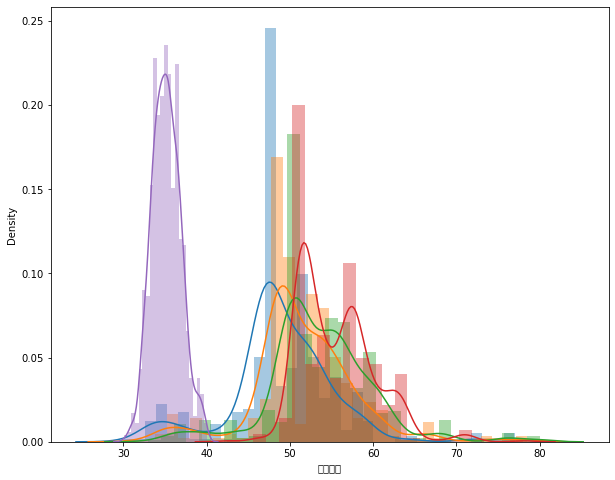

In [67]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(tops_S['어깨너비'])
sns.distplot(tops_M['어깨너비'])
sns.distplot(tops_L['어깨너비'])
sns.distplot(tops_XL['어깨너비'])
sns.distplot(wm_shd_1992.query("나이 >= 20")['어깨너비'])

In [73]:
dt_1997 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/1997_size_measures.csv")
wm_dt_1997 = dt_1997.query("성별 == '여자'")

wm_dt_1997.iloc[:, 4:] = wm_dt_1997.iloc[:, 4:] / 10

wm_shd_1997 = wm_dt_1997[['나이', '키', '어깨너비']]

wm_shd_1997.query("나이 >= 20")

C:\Users\AB350\AppData\Local\Temp\ipykernel_12304\2611209705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wm_dt_1997.iloc[:, 4:] = wm_dt_1997.iloc[:, 4:] / 10


,나이,키,어깨너비
11244,20,162.0000,37.3
11245,20,165.6000,34.9
11246,20,167.1000,35.5
11247,20,166.2000,33.6
11248,20,155.9000,35.8
...,...,...,...
12888,76,151.1000,34.5
12889,65,165.1277,37.3
12890,63,159.5000,35.4
12891,70,144.6000,33.1


C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='어깨너비', ylabel='Density'>

C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44648 (\N{HANGUL SYLLABLE GGAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


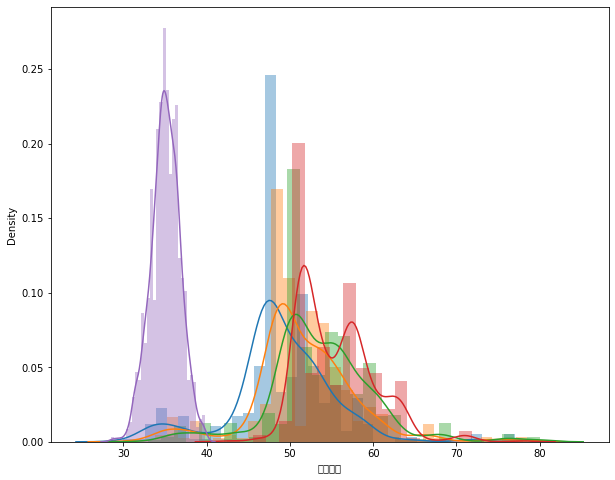

In [74]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(tops_S['어깨너비'])
sns.distplot(tops_M['어깨너비'])
sns.distplot(tops_L['어깨너비'])
sns.distplot(tops_XL['어깨너비'])
sns.distplot(wm_shd_1997.query("나이 >= 20")['어깨너비'])

In [82]:
dt_2010 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/2010_size_measures.csv")
wm_dt_2010 = dt_2010.query("성별 == '여'")

In [83]:
wm_dt_2010[['키', '어깨너비']] = wm_dt_2010[['키', '어깨너비']] / 10
wm_dt_2010[['나이', '키', '어깨너비']]

C:\Users\AB350\AppData\Local\Temp\ipykernel_12304\2410682458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wm_dt_2010[['키', '어깨너비']] = wm_dt_2010[['키', '어깨너비']] / 10


,나이,키,어깨너비
7532,7,110.7,23.9
7533,7,115.9,26.0
7534,7,119.0,25.9
7535,7,122.4,29.2
7536,7,122.5,27.2
...,...,...,...
14011,66,154.7,35.1
14012,61,147.5,36.4
14013,66,153.1,36.6
14014,61,156.3,36.0


In [84]:
wm_shd_2010 = wm_dt_2010[['나이', '키', '어깨너비']]
wm_shd_2010.query("나이 >= 20")

,나이,키,어깨너비
11571,22,153.5,33.5
11572,21,154.0,30.7
11573,21,161.7,35.4
11574,20,164.5,34.7
11575,21,169.0,40.3
...,...,...,...
14011,66,154.7,35.1
14012,61,147.5,36.4
14013,66,153.1,36.6
14014,61,156.3,36.0


C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='어깨너비', ylabel='Density'>

C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44648 (\N{HANGUL SYLLABLE GGAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


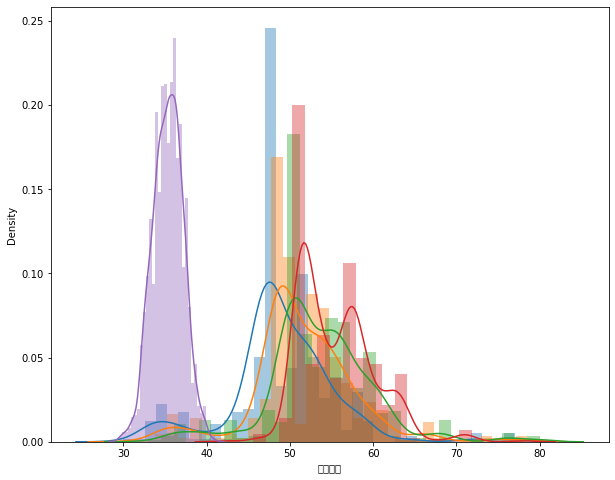

In [85]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(tops_S['어깨너비'])
sns.distplot(tops_M['어깨너비'])
sns.distplot(tops_L['어깨너비'])
sns.distplot(tops_XL['어깨너비'])
sns.distplot(wm_shd_2010.query("나이 >= 20")['어깨너비'])

In [86]:
dt_2015 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/2015_size_measures.csv")
wm_dt_2015 = dt_2015.query("성별 == '여'")

wm_dt_2015[['키', '어깨너비']] = wm_dt_2015[['키', '어깨너비']] / 10

wm_shd_2015 = wm_dt_2015[['나이', '키', '어깨너비']]
wm_shd_2015.query("나이 >= 20")

C:\Users\AB350\AppData\Local\Temp\ipykernel_12304\2618142126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wm_dt_2015[['키', '어깨너비']] = wm_dt_2015[['키', '어깨너비']] / 10


,나이,키,어깨너비
44,20,156.0,34.2
45,31,154.4,35.0
47,21,165.6,38.0
48,55,166.1,39.9
49,22,166.9,37.1
...,...,...,...
6415,20,170.6,36.3
6416,20,162.4,35.5
6417,44,150.8,35.2
6418,20,157.4,35.0


C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='어깨너비', ylabel='Density'>

C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44648 (\N{HANGUL SYLLABLE GGAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


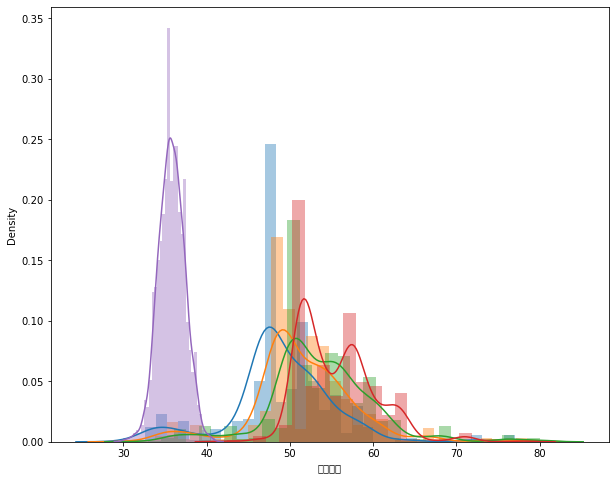

In [87]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(tops_S['어깨너비'])
sns.distplot(tops_M['어깨너비'])
sns.distplot(tops_L['어깨너비'])
sns.distplot(tops_XL['어깨너비'])
sns.distplot(wm_shd_2015.query("나이 >= 20")['어깨너비'])

### * 미니 원피스

In [12]:
dt_2020 = pd.read_csv("C:/Users/admin/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")
dt_2020[:5]

C:\Users\admin\AppData\Local\Temp\ipykernel_2348\2699867853.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dt_2020 = pd.read_csv("C:/Users/admin/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")


,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,128. 배꼽수준앞중심길이,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌)
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,449,453.0,356.5,546.5,882,796,659,626.0,294.0,332.0
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,360,391.0,331.5,477.5,731,738,592,544.0,234.0,310.0
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,372,405.0,326.5,488.5,749,738,601,552.0,203.0,349.0
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,434,428.0,331.5,517.5,741,753,611,581.0,268.0,313.0
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,405,415.0,333.5,527.5,696,716,578,544.0,245.0,299.0


In [13]:
dt_2020.query("나이 >= 20")

,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,128. 배꼽수준앞중심길이,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌)
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,449,453.0,356.5,546.5,882,796,659,626.0,294.0,332.0
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,360,391.0,331.5,477.5,731,738,592,544.0,234.0,310.0
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,372,405.0,326.5,488.5,749,738,601,552.0,203.0,349.0
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,434,428.0,331.5,517.5,741,753,611,581.0,268.0,313.0
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,405,415.0,333.5,527.5,696,716,578,544.0,245.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,5070,21_F_7275,여,2021,924,27,경상권,82.0,85.0,81.0,...,390,448.0,319.5,483.5,753,767,636,575.0,269.0,306.0
5070,5071,21_F_7276,여,2021,924,34,경상권,79.0,80.0,77.0,...,349,396.0,328.0,460.0,640,723,579,529.0,248.0,281.0
5071,5072,21_F_7277,여,2021,924,32,경상권,97.0,95.0,87.0,...,428,440.0,367.5,547.5,760,774,634,589.0,259.0,330.0
5082,5083,21_F_7288,여,2021,924,31,경상권,91.0,80.0,81.0,...,410,450.0,366.5,506.5,784,729,620,568.0,244.0,324.0


#### ① (목뒤높이 - 허리높이) + (허리높이 - 무릎높이) / 2

In [14]:
#004. 목뒤높이, 009. 허리높이, 014. 무릎높이
dt_2020.loc[:, "004. 목뒤높이 "] = dt_2020.loc[:, "004. 목뒤높이 "] / 10
dt_2020.loc[:, "009. 허리높이 "] = dt_2020.loc[:, "009. 허리높이 "] / 10
dt_2020.loc[:, "014. 무릎높이 "] = dt_2020.loc[:, "014. 무릎높이 "] / 10

In [15]:
dt_2020['mini_dress_length'] = (dt_2020.loc[:, "004. 목뒤높이 "] - dt_2020.loc[:, "009. 허리높이 "]) + (dt_2020.loc[:, "009. 허리높이 "] - dt_2020.loc[:, "014. 무릎높이 "]) * 0.5
dt_2020[:5]

,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌),mini_dress_length
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,453.0,356.5,546.5,882,796,659,626.0,294.0,332.0,71.00
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,391.0,331.5,477.5,731,738,592,544.0,234.0,310.0,65.25
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,405.0,326.5,488.5,749,738,601,552.0,203.0,349.0,67.55
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,428.0,331.5,517.5,741,753,611,581.0,268.0,313.0,66.40
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,415.0,333.5,527.5,696,716,578,544.0,245.0,299.0,64.00


In [16]:
md_dt_2020 = dt_2020[['나이', 'mini_dress_length']].sort_values(by='나이')
md_dt_2020

,나이,mini_dress_length
4551,20,69.20
1102,20,66.95
1103,20,67.60
2849,20,65.70
1104,20,63.25
...,...,...
2241,69,64.45
2109,69,66.20
2222,69,62.00
4295,69,63.90


In [19]:
mini_dress_data

,measures,size,columns
0,81.5,XS,총장
1,35.7,XS,어깨너비
2,41.5,XS,가슴단면
3,17.8,XS,소매길이
4,82.5,S,총장
...,...,...,...
3,79,095,총장
4,31,095,어깨너비
5,39,095,가슴단면
0,81,FREE,총장


In [20]:
mini_dress_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5096 entries, 0 to 1
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   measures  5096 non-null   object
 1   size      5094 non-null   object
 2   columns   5091 non-null   object
dtypes: object(3)
memory usage: 159.2+ KB


In [22]:
mini_dress_data['measures'] = mini_dress_data['measures'].astype('float')
mini_dress_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5096 entries, 0 to 1
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   measures  5096 non-null   float64
 1   size      5094 non-null   object 
 2   columns   5091 non-null   object 
dtypes: float64(1), object(2)
memory usage: 159.2+ KB


In [23]:
mini_S = mini_dress_data.query("size == 'S'").reset_index().drop(['index'], axis=1)
mini_M = mini_dress_data.query("size == 'M'").reset_index().drop(['index'], axis=1)
mini_L = mini_dress_data.query("size == 'L'").reset_index().drop(['index'], axis=1)
mini_XL = mini_dress_data.query("size == 'XL'").reset_index().drop(['index'], axis=1)

In [25]:
mini_S.query("columns == '총장'").sort_values(by='measures')

,measures,size,columns
259,34.5,S,총장
945,39.0,S,총장
194,42.0,S,총장
814,52.0,S,총장
499,57.0,S,총장
...,...,...,...
903,94.0,S,총장
479,95.2,S,총장
965,107.0,S,총장
1139,107.0,S,총장


In [27]:
mini_S_total = mini_S.query("columns == '총장'").sort_values(by='measures')
mini_S_total['measures']

259      34.5
945      39.0
194      42.0
814      52.0
499      57.0
        ...  
903      94.0
479      95.2
965     107.0
1139    107.0
332     123.5
Name: measures, Length: 388, dtype: float64

In [28]:
mini_M_total = mini_M.query("columns == '총장'").sort_values(by='measures')
mini_M_total['measures']

257      37.0
920      40.0
192      44.0
791      54.5
486      58.4
        ...  
225      97.0
152      97.0
1109    109.0
940     109.0
326     125.0
Name: measures, Length: 372, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='mini_dress_length', ylabel='Density'>

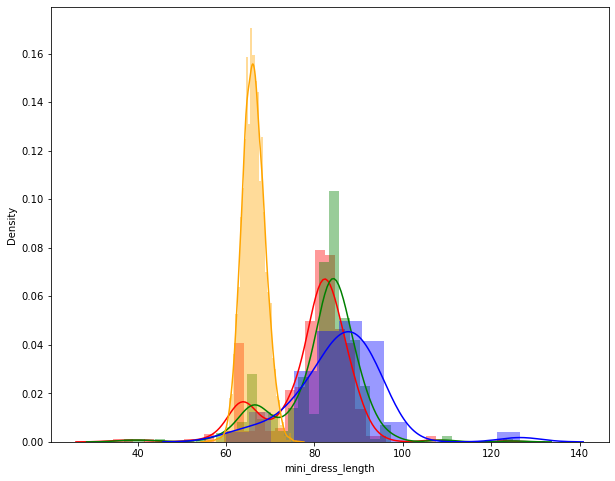

In [37]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(mini_S_total['measures'], color='red')
sns.distplot(mini_M_total['measures'], color='green')
sns.distplot(mini_L_total['measures'], color='blue')
sns.distplot(md_dt_2020['mini_dress_length'], color='orange')

#### ② (목뒤높이 - 허리높이) + (허리높이 - 무릎높이)

In [31]:
dt_2020['mini_dress_length_2'] = (dt_2020.loc[:, "004. 목뒤높이 "] - dt_2020.loc[:, "009. 허리높이 "]) + (dt_2020.loc[:, "009. 허리높이 "] - dt_2020.loc[:, "014. 무릎높이 "])
dt_2020[:5]

,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌),mini_dress_length,mini_dress_length_2
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,356.5,546.5,882,796,659,626.0,294.0,332.0,71.00,101.3
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,331.5,477.5,731,738,592,544.0,234.0,310.0,65.25,92.8
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,326.5,488.5,749,738,601,552.0,203.0,349.0,67.55,96.8
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,331.5,517.5,741,753,611,581.0,268.0,313.0,66.40,95.2
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,333.5,527.5,696,716,578,544.0,245.0,299.0,64.00,90.7


In [32]:
md_dt_2020_2 = dt_2020[['나이', 'mini_dress_length_2']].sort_values(by='나이')
md_dt_2020_2

,나이,mini_dress_length_2
4551,20,97.8
1102,20,95.6
1103,20,97.4
2849,20,93.1
1104,20,91.1
...,...,...
2241,69,93.9
2109,69,91.9
2222,69,87.8
4295,69,89.6


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

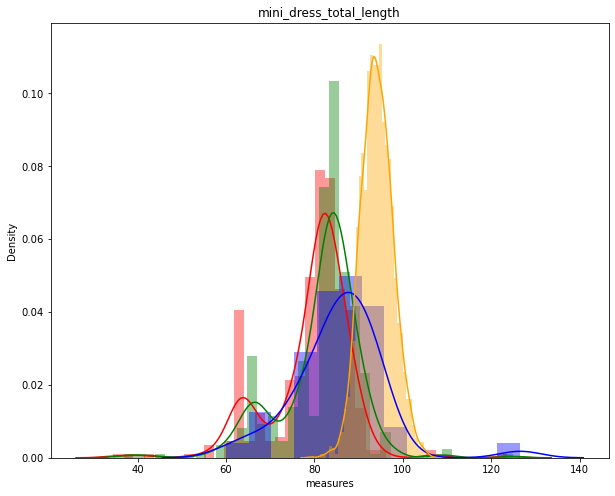

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('mini_dress_total_length')

sns.distplot(mini_S_total['measures'], color='red')
sns.distplot(mini_M_total['measures'], color='green')
sns.distplot(mini_L_total['measures'], color='blue')
sns.distplot(md_dt_2020_2[['mini_dress_length_2']], color='orange')

plt.savefig('mini_dress_total_length.png')

## 5) 무신사 내 상품 사이즈의 S, M, L, XL 치수의 평균값 (파이차트 시각화)

In [3]:
mini_dress_data = pd.read_csv('C:/Users/AB350/#실습(221031~221111)/mini_dress_data.csv')
mini_dress_data

,Unnamed: 0,measures,size,columns
0,0,82.0,FREE,총장
1,1,42.0,FREE,어깨너비
2,2,50.0,FREE,가슴단면
3,3,62.0,FREE,소매길이
4,0,81.5,XS,총장
...,...,...,...,...
5087,5,40.0,M,가슴단면
5088,0,84.0,FREE,총장
5089,1,42.5,FREE,어깨너비
5090,2,46.0,FREE,가슴단면


In [4]:
mini_dress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5092 entries, 0 to 5091
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5092 non-null   int64  
 1   measures    5092 non-null   float64
 2   size        5090 non-null   object 
 3   columns     5087 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 159.2+ KB


### * 결측치 제거

In [5]:
mini_dress_data.isnull().sum()

Unnamed: 0    0
measures      0
size          2
columns       5
dtype: int64

In [6]:
mini_dress_data.dropna(axis=0, inplace=True)

In [7]:
mini_dress_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5091
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5087 non-null   int64  
 1   measures    5087 non-null   float64
 2   size        5087 non-null   object 
 3   columns     5087 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 198.7+ KB


In [8]:
mini_dress_data.reset_index(inplace=True)

In [9]:
mini_dress_data = mini_dress_data.iloc[:, 2:]
mini_dress_data

,measures,size,columns
0,82.0,FREE,총장
1,42.0,FREE,어깨너비
2,50.0,FREE,가슴단면
3,62.0,FREE,소매길이
4,81.5,XS,총장
...,...,...,...
5082,40.0,M,가슴단면
5083,84.0,FREE,총장
5084,42.5,FREE,어깨너비
5085,46.0,FREE,가슴단면


### ① 의미없는 사이즈 표기 제외

In [10]:
mini_dress_data['size'].unique()

array(['FREE', 'XS', 'S', 'M', 'L', 'OS', '1', '2', '옵션없음', '1(S)',
       '2(M)', 'BLACK', 'medium', 'S_085', 'M_090', 'ONEPIECE BLACK:1',
       'ONEPIECE BLACK:2', 'Free', 'XL', 'F', '090', '095', '100',
       's size', 'm size', '1 SIZE', '2 SIZE', '네이비', 'free', 'S-Long',
       '85', '88', '91', 'S_PURPLE', 'ONE', '화이트 M', '화이트 L', 'XS_85',
       'S_90', '0', 'WHITE/S', 'WHITE/M', '01S', '02M', 'M_088', 'L_091',
       '옐로우 M', '옐로우 L', 'charcoal', 'ONE SIZE', 'SMALL', 'MEDIUM', 'SM',
       's', 'm', 'black / F', 'blue', 'L_DDP00187', '프리', 'SMALL_55',
       'MEDIUM_66', 'one size', '90', '95', 'S(55)', 'M(66)', 'One Size',
       'S SIZE', 'M SIZE', '블랙/FREE', '네이비/S', '네이비/M', '32(XS)', '34(S)',
       '36(M)', 'XS（85호）', 'S（90호）', 'M（95호）', 'L（100호）', 'XL（105호）',
       '55', '66', 'XS (85)', 'S (90)', 'M (95)', 'L (100)', '36(S)',
       '38(M)', 'L_DDP00189', 'L_DDP00183', '3', 'One', '38(55)',
       '40(66)', '프리사이즈', 'XS-S', 'M-L', 'L-XL', '로열블루/FREE', 'FF', 'Red',
  

In [11]:
drop_size_columns = ['OS', '1', '2', '옵션없음', 'BLACK', 'ONEPIECE BLACK:1',
                     'ONEPIECE BLACK:2', '090', '095', '100', '1 SIZE', '2 SIZE',
                     '네이비', '85', '88', '91', '0', 'charcoal', 'SM', 'blue',
                     'L_DDP00187','90', '95', '55', '66', 'L_DDP00189', 'L_DDP00183',
                     '3', '38(55)', '40(66)', 'XS-S', 'M-L', 'L-XL', 'Red',
                     'black', '085', '34', '36', '38']

drop_index = []

for i in range(len(mini_dress_data['size'])):
    if mini_dress_data['size'][i] in drop_size_columns:
        drop_index.append(i)
        #print(mini_dress_data.drop(mini_dress_data.iloc[i, :], axis=0))
    else:
        continue

mini_dress_data.drop(drop_index, inplace=True)

#print('drop_index:', drop_index)
#print()
print('unique:', mini_dress_data['size'].unique())

unique: ['FREE' 'XS' 'S' 'M' 'L' '1(S)' '2(M)' 'medium' 'S_085' 'M_090' 'Free'
 'XL' 'F' 's size' 'm size' 'free' 'S-Long' 'S_PURPLE' 'ONE' '화이트 M'
 '화이트 L' 'XS_85' 'S_90' 'WHITE/S' 'WHITE/M' '01S' '02M' 'M_088' 'L_091'
 '옐로우 M' '옐로우 L' 'ONE SIZE' 'SMALL' 'MEDIUM' 's' 'm' 'black / F' '프리'
 'SMALL_55' 'MEDIUM_66' 'one size' 'S(55)' 'M(66)' 'One Size' 'S SIZE'
 'M SIZE' '블랙/FREE' '네이비/S' '네이비/M' '32(XS)' '34(S)' '36(M)' 'XS（85호）'
 'S（90호）' 'M（95호）' 'L（100호）' 'XL（105호）' 'XS (85)' 'S (90)' 'M (95)'
 'L (100)' '36(S)' '38(M)' 'One' '프리사이즈' '로열블루/FREE' 'FF' '00(S)' '0(M)'
 'S(80)' 'M(85)' 'One size' 'BLUE/FREE']


In [ ]:
#mini_dress_data.isin(drop_size_columns).sum()
#mini_dress_data[mini_dress_data['size'] in drop_size_columns]

In [12]:
mini_dress_data

,measures,size,columns
0,82.0,FREE,총장
1,42.0,FREE,어깨너비
2,50.0,FREE,가슴단면
3,62.0,FREE,소매길이
4,81.5,XS,총장
...,...,...,...
5082,40.0,M,가슴단면
5083,84.0,FREE,총장
5084,42.5,FREE,어깨너비
5085,46.0,FREE,가슴단면


In [13]:
mini_dress_data = mini_dress_data.reset_index().iloc[:, 1:]
mini_dress_data

,measures,size,columns
0,82.0,FREE,총장
1,42.0,FREE,어깨너비
2,50.0,FREE,가슴단면
3,62.0,FREE,소매길이
4,81.5,XS,총장
...,...,...,...
4467,40.0,M,가슴단면
4468,84.0,FREE,총장
4469,42.5,FREE,어깨너비
4470,46.0,FREE,가슴단면


### ② 사이즈 표기 통일 (FREE, XS, S, M, L, XL)

In [14]:
mini_dress_data['size'].unique()

array(['FREE', 'XS', 'S', 'M', 'L', '1(S)', '2(M)', 'medium', 'S_085',
       'M_090', 'Free', 'XL', 'F', 's size', 'm size', 'free', 'S-Long',
       'S_PURPLE', 'ONE', '화이트 M', '화이트 L', 'XS_85', 'S_90', 'WHITE/S',
       'WHITE/M', '01S', '02M', 'M_088', 'L_091', '옐로우 M', '옐로우 L',
       'ONE SIZE', 'SMALL', 'MEDIUM', 's', 'm', 'black / F', '프리',
       'SMALL_55', 'MEDIUM_66', 'one size', 'S(55)', 'M(66)', 'One Size',
       'S SIZE', 'M SIZE', '블랙/FREE', '네이비/S', '네이비/M', '32(XS)', '34(S)',
       '36(M)', 'XS（85호）', 'S（90호）', 'M（95호）', 'L（100호）', 'XL（105호）',
       'XS (85)', 'S (90)', 'M (95)', 'L (100)', '36(S)', '38(M)', 'One',
       '프리사이즈', '로열블루/FREE', 'FF', '00(S)', '0(M)', 'S(80)', 'M(85)',
       'One size', 'BLUE/FREE'], dtype=object)

In [15]:
print(mini_dress_data['size'].iloc[0])
print(mini_dress_data['size'].iloc[0].replace(mini_dress_data['size'].iloc[0], 'Free'))

FREE
Free


#### * size 표기를 모두 대문자로 변경

In [16]:
for i in range(len(mini_dress_data['size'])):
    mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].upper()

print(mini_dress_data['size'].unique())

C:\Users\AB350\AppData\Local\Temp\ipykernel_9160\1444818511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].upper()


['FREE' 'XS' 'S' 'M' 'L' '1(S)' '2(M)' 'MEDIUM' 'S_085' 'M_090' 'XL' 'F'
 'S SIZE' 'M SIZE' 'S-LONG' 'S_PURPLE' 'ONE' '화이트 M' '화이트 L' 'XS_85'
 'S_90' 'WHITE/S' 'WHITE/M' '01S' '02M' 'M_088' 'L_091' '옐로우 M' '옐로우 L'
 'ONE SIZE' 'SMALL' 'BLACK / F' '프리' 'SMALL_55' 'MEDIUM_66' 'S(55)'
 'M(66)' '블랙/FREE' '네이비/S' '네이비/M' '32(XS)' '34(S)' '36(M)' 'XS（85호）'
 'S（90호）' 'M（95호）' 'L（100호）' 'XL（105호）' 'XS (85)' 'S (90)' 'M (95)'
 'L (100)' '36(S)' '38(M)' '프리사이즈' '로열블루/FREE' 'FF' '00(S)' '0(M)' 'S(80)'
 'M(85)' 'BLUE/FREE']


#### * 사이즈 표기 통일 (Free, XS, S, M, L, XL)

In [17]:
#re.sub(".+123.+", "#", string)
#re.search("L.*", mini_dress_data['size'].iloc[i])
for i in range(len(mini_dress_data['size'])):
    if re.search("F.*", mini_dress_data['size'].iloc[i]):
        mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'Free')
        
    elif 'ONE' in mini_dress_data['size'].iloc[i]:
        mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'Free')
        
    elif 'OS' in mini_dress_data['size'].iloc[i]:
        mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'Free')
        
    elif '프리' in mini_dress_data['size'].iloc[i]:
        mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'Free')
        
    elif 'XS' in mini_dress_data['size'].iloc[i]:
        mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'XS')
        
    elif re.search("M.*", mini_dress_data['size'].iloc[i]):
        mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'M')
    
    elif re.search("S.*", mini_dress_data['size'].iloc[i]):
        mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'S')
        
    elif 'XL' in mini_dress_data['size'].iloc[i]:
        mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'XL')
        
    else:
        mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'L')

C:\Users\AB350\AppData\Local\Temp\ipykernel_9160\2348407223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'Free')
C:\Users\AB350\AppData\Local\Temp\ipykernel_9160\2348407223.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_dress_data['size'].iloc[i] = mini_dress_data['size'].iloc[i].replace(mini_dress_data['size'].iloc[i], 'XS')
C:\Users\AB350\AppData\Local\Temp\ipykernel_9160\2348407223.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

In [18]:
mini_dress_data['size'].unique()

array(['Free', 'XS', 'S', 'M', 'L', 'XL'], dtype=object)

### ③ 사이즈별 치수의 평균값 (총장, 어깨너비, 가슴단면, 소매길이)

In [19]:
mini_dress_data.groupby(['columns', 'size'])[['measures']].mean().round(3)

measures
columns size          
가슴단면    Free    45.193
        L       46.895
        M       44.769
        S       42.361
        XL      53.000
        XS      40.537
밑단단면    M       49.625
        S       48.000
소매길이    Free    47.129
        L       29.941
        M       41.937
        S       41.580
        XL      30.375
        XS      41.663
어깨너비    Free    39.821
        L       37.790
        M       38.531
        S       37.142
        XL      50.400
        XS      36.810
엉덩이단면   Free    47.277
        L       53.500
        M       50.043
        S       48.401
        XL      61.750
        XS      43.444
총장      Free    81.132
        L       84.970
        M       81.414
        S       79.362
        XL      85.571
        XS      78.298
허리단면    M       38.625
        S       36.500

In [20]:
mini_dress_XS = mini_dress_data.query("size == 'XS'")
mini_dress_S = mini_dress_data.query("size == 'S'")
mini_dress_M = mini_dress_data.query("size == 'M'")
mini_dress_Free = mini_dress_data.query("size == 'Free'")
mini_dress_L = mini_dress_data.query("size == 'L'")
mini_dress_XL = mini_dress_data.query("size == 'XL'")

#총장
print('XS_총장:', np.round(mini_dress_XS.query("columns == '총장'")['measures'].mean(), 3))
print('S_총장:', np.round(mini_dress_S.query("columns == '총장'")['measures'].mean(), 3))
print('M_총장:', np.round(mini_dress_M.query("columns == '총장'")['measures'].mean(), 3))
print('Free_총장:', np.round(mini_dress_Free.query("columns == '총장'")['measures'].mean(), 3))
print('L_총장:', np.round(mini_dress_L.query("columns == '총장'")['measures'].mean(), 3))
print('XL_총장:', np.round(mini_dress_XL.query("columns == '총장'")['measures'].mean(), 3))
print()

#어깨너비
print('XS_어깨너비:', np.round(mini_dress_XS.query("columns == '어깨너비'")['measures'].mean(), 3))
print('S_어깨너비:', np.round(mini_dress_S.query("columns == '어깨너비'")['measures'].mean(), 3))
print('M_어깨너비:', np.round(mini_dress_M.query("columns == '어깨너비'")['measures'].mean(), 3))
print('Free_어깨너비:', np.round(mini_dress_Free.query("columns == '어깨너비'")['measures'].mean(), 3))
print('L_어깨너비:', np.round(mini_dress_L.query("columns == '어깨너비'")['measures'].mean(), 3))
print('XL_어깨너비:', np.round(mini_dress_XL.query("columns == '어깨너비'")['measures'].mean(), 3))
print()

#가슴단면
print('XS_가슴단면:', np.round(mini_dress_XS.query("columns == '가슴단면'")['measures'].mean(), 3))
print('S_가슴단면:', np.round(mini_dress_S.query("columns == '가슴단면'")['measures'].mean(), 3))
print('M_가슴단면:', np.round(mini_dress_M.query("columns == '가슴단면'")['measures'].mean(), 3))
print('Free_가슴단면:', np.round(mini_dress_Free.query("columns == '가슴단면'")['measures'].mean(), 3))
print('L_가슴단면:', np.round(mini_dress_L.query("columns == '가슴단면'")['measures'].mean(), 3))
print('XL_가슴단면:', np.round(mini_dress_XL.query("columns == '가슴단면'")['measures'].mean(), 3))
print()

#소매길이
print('XS_소매길이:', np.round(mini_dress_XS.query("columns == '소매길이'")['measures'].mean(), 3))
print('S_소매길이:', np.round(mini_dress_S.query("columns == '소매길이'")['measures'].mean(), 3))
print('M_소매길이:', np.round(mini_dress_M.query("columns == '소매길이'")['measures'].mean(), 3))
print('Free_소매길이:', np.round(mini_dress_Free.query("columns == '소매길이'")['measures'].mean(), 3))
print('L_소매길이:', np.round(mini_dress_L.query("columns == '소매길이'")['measures'].mean(), 3))
print('XL_소매길이:', np.round(mini_dress_XL.query("columns == '소매길이'")['measures'].mean(), 3))

XS_총장: 78.298
S_총장: 79.362
M_총장: 81.414
Free_총장: 81.132
L_총장: 84.97
XL_총장: 85.571

XS_어깨너비: 36.81
S_어깨너비: 37.142
M_어깨너비: 38.531
Free_어깨너비: 39.821
L_어깨너비: 37.79
XL_어깨너비: 50.4

XS_가슴단면: 40.537
S_가슴단면: 42.361
M_가슴단면: 44.769
Free_가슴단면: 45.193
L_가슴단면: 46.895
XL_가슴단면: 53.0

XS_소매길이: 41.663
S_소매길이: 41.58
M_소매길이: 41.937
Free_소매길이: 47.129
L_소매길이: 29.941
XL_소매길이: 30.375


### ④ 사이즈 코리아 데이터

In [27]:
dt_2020 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")
dt_2020[:5]

C:\Users\AB350\AppData\Local\Temp\ipykernel_9160\2322243998.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dt_2020 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")


,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,128. 배꼽수준앞중심길이,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌)
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,449,453.0,356.5,546.5,882,796,659,626.0,294.0,332.0
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,360,391.0,331.5,477.5,731,738,592,544.0,234.0,310.0
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,372,405.0,326.5,488.5,749,738,601,552.0,203.0,349.0
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,434,428.0,331.5,517.5,741,753,611,581.0,268.0,313.0
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,405,415.0,333.5,527.5,696,716,578,544.0,245.0,299.0


In [28]:
dt_2020.loc[:, ['002. 키 ', '018. 가슴너비 ', '041. 가슴둘레 ']]

,002. 키,018. 가슴너비,041. 가슴둘레
3,1685,309,993
4,1602,263,818
5,1642,263,839
6,1589,276,867
7,1531,280,902
...,...,...,...
5069,1597,295,832
5070,1548,283,789
5071,1645,289,942
5082,1635,284,868


In [29]:
dt_2020['041. 가슴둘레/2 '] = dt_2020['041. 가슴둘레 '] * 0.5
dt_2020.loc[:, ['002. 키 ', '018. 가슴너비 ', '041. 가슴둘레/2 ']]

,002. 키,018. 가슴너비,041. 가슴둘레/2
3,1685,309,496.5
4,1602,263,409.0
5,1642,263,419.5
6,1589,276,433.5
7,1531,280,451.0
...,...,...,...
5069,1597,295,416.0
5070,1548,283,394.5
5071,1645,289,471.0
5082,1635,284,434.0


In [30]:
dt_2020['가슴단면'] = dt_2020['041. 가슴둘레/2 '] * 0.1
dt_2020['키'] = dt_2020['002. 키 '] * 0.1

dt_chest_2020 = dt_2020.loc[:, ['나이', '키', '가슴단면']]
dt_chest_2020

,나이,키,가슴단면
3,42,168.5,49.65
4,42,160.2,40.90
5,40,164.2,41.95
6,43,158.9,43.35
7,40,153.1,45.10
...,...,...,...
5069,27,159.7,41.60
5070,34,154.8,39.45
5071,32,164.5,47.10
5082,31,163.5,43.40


In [31]:
dt_chest_2020 = dt_chest_2020.sort_values(by='나이').reset_index().iloc[:, 1:]
dt_chest_2020

,나이,키,가슴단면
0,20,162.4,40.20
1,20,165.3,48.95
2,20,168.5,43.20
3,20,158.6,44.50
4,20,156.1,43.25
...,...,...,...
2768,69,170.0,43.75
2769,69,156.0,50.00
2770,69,153.8,46.35
2771,69,153.1,48.85


In [32]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AB350\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='가슴단면', ylabel='Density'>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49844 (\N{HANGUL SYLLABLE SEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


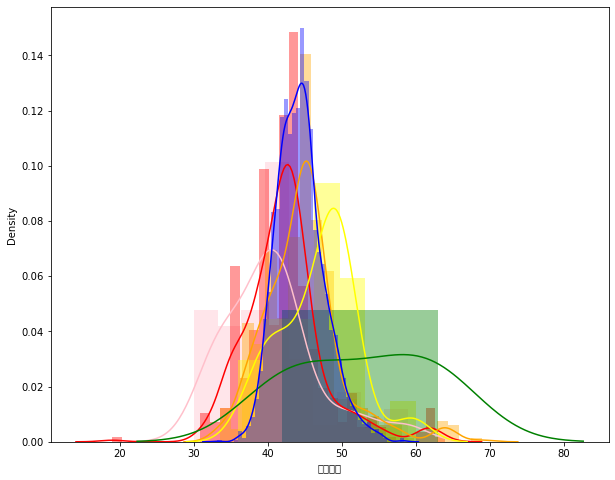

In [33]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(mini_dress_XS.query("columns == '가슴단면'")['measures'], color='pink')
sns.distplot(mini_dress_S.query("columns == '가슴단면'")['measures'], color='red')
sns.distplot(mini_dress_M.query("columns == '가슴단면'")['measures'], color='orange')
sns.distplot(mini_dress_L.query("columns == '가슴단면'")['measures'], color='yellow')
sns.distplot(mini_dress_XL.query("columns == '가슴단면'")['measures'], color='green')
sns.distplot(dt_chest_2020['가슴단면'], color='blue')

#### * pie chart

In [34]:
print('XS_가슴단면:', np.round(mini_dress_XS.query("columns == '가슴단면'")['measures'].mean(), 2))
print('S_가슴단면:', np.round(mini_dress_S.query("columns == '가슴단면'")['measures'].mean(), 2))
print('M_가슴단면:', np.round(mini_dress_M.query("columns == '가슴단면'")['measures'].mean(), 2))
print('Free_가슴단면:', np.round(mini_dress_Free.query("columns == '가슴단면'")['measures'].mean(), 2))
print('L_가슴단면:', np.round(mini_dress_L.query("columns == '가슴단면'")['measures'].mean(), 2))
print('XL_가슴단면:', np.round(mini_dress_XL.query("columns == '가슴단면'")['measures'].mean(), 2))

XS_가슴단면: 40.54
S_가슴단면: 42.36
M_가슴단면: 44.77
Free_가슴단면: 45.19
L_가슴단면: 46.89
XL_가슴단면: 53.0


In [35]:
dt_chest_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      2773 non-null   int64  
 1   키       2773 non-null   float64
 2   가슴단면    2773 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 65.1 KB


In [36]:
chest_data = list(np.array(dt_chest_2020['가슴단면']))
chest_data

[40.2,
 48.95,
 43.2,
 44.5,
 43.25,
 44.5,
 42.650000000000006,
 39.150000000000006,
 45.1,
 54.650000000000006,
 50.150000000000006,
 42.0,
 39.25,
 40.0,
 48.25,
 39.0,
 42.400000000000006,
 44.800000000000004,
 41.5,
 44.650000000000006,
 43.150000000000006,
 45.150000000000006,
 46.0,
 42.45,
 42.400000000000006,
 40.650000000000006,
 48.6,
 46.45,
 40.550000000000004,
 44.35,
 40.85,
 42.95,
 42.0,
 49.5,
 41.800000000000004,
 50.150000000000006,
 42.2,
 41.0,
 45.5,
 44.400000000000006,
 42.85,
 44.650000000000006,
 41.150000000000006,
 42.050000000000004,
 40.75,
 45.1,
 42.5,
 39.7,
 42.400000000000006,
 46.95,
 39.900000000000006,
 39.800000000000004,
 41.050000000000004,
 44.35,
 44.400000000000006,
 41.85,
 44.35,
 43.400000000000006,
 40.800000000000004,
 37.9,
 46.35,
 51.400000000000006,
 43.550000000000004,
 44.900000000000006,
 45.400000000000006,
 42.25,
 44.800000000000004,
 44.85,
 47.400000000000006,
 40.5,
 43.0,
 45.85,
 41.1,
 39.550000000000004,
 45.95,
 40.1,


In [68]:
dt_chest_2020['size'] = np.random.randint(2773)
size_lst = []

for chest in chest_data:
    if chest >= np.round((42.34 - 42.34*0.25), 2) and chest <= np.round((42.34 + 42.34*0.25), 2):
        size_lst.append('S')
        
    elif chest >= np.round((44.74 - 44.74*0.25), 2) and chest <= np.round((44.74 + 44.74*0.25), 2):
        size_lst.append('M')
        
    elif chest >= np.round((46.14 - 46.14*0.25), 2) and chest <= np.round((46.14 + 46.14*0.25), 2):
        size_lst.append('L')
        
    elif chest >= np.round((51.61 - 51.61*0.25), 2) and chest <= np.round((51.61 + 51.61*0.25), 2):
        size_lst.append('XL')
        
#print(size_lst)
#print()

dt_chest_2020['size'] = size_lst

print(dt_chest_2020)

      나이      키  가슴둘레/2 size
0     20  162.4   40.20    S
1     20  165.3   48.95    S
2     20  168.5   43.20    S
3     20  158.6   44.50    S
4     20  156.1   43.25    S
...   ..    ...     ...  ...
2768  69  170.0   43.75    S
2769  69  156.0   50.00    S
2770  69  153.8   46.35    S
2771  69  153.1   48.85    S
2772  69  153.5   45.75    S

[2773 rows x 4 columns]


In [37]:
#수정수정수정
dt_chest_2020['size'] = np.random.randint(2773)
size_lst = []

for chest in chest_data:
    if chest <= 40.54:
        size_lst.append('XS')
    
    elif chest <= 42.36:
        size_lst.append('S')
        
    elif chest <= 44.77:
        size_lst.append('M')
        
    elif chest <= 45.19:
        size_lst.append('Free')
        
    elif chest <= 46.89:
        size_lst.append('L')
        
    else:
        size_lst.append('XL')
        
#print(size_lst)
#print()

dt_chest_2020['size'] = size_lst

dt_chest_2020

,나이,키,가슴단면,size
0,20,162.4,40.20,XS
1,20,165.3,48.95,XL
2,20,168.5,43.20,M
3,20,158.6,44.50,M
4,20,156.1,43.25,M
...,...,...,...,...
2768,69,170.0,43.75,M
2769,69,156.0,50.00,XL
2770,69,153.8,46.35,L
2771,69,153.1,48.85,XL


In [38]:
dt_chest_2020['size'].value_counts()

M       841
XL      564
S       494
L       465
XS      260
Free    149
Name: size, dtype: int64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


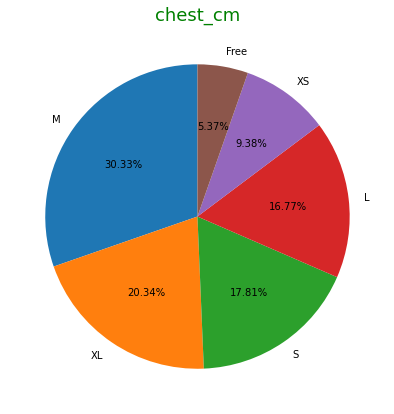

In [39]:
plt.figure(figsize=(7,7))

# pie chart 만들기(차트 띄우기, labels 달기, 각 조정, 그림자, 값 소숫점 표시)
plt.pie(dt_chest_2020['size'].value_counts(), labels=('M', 'XL', 'S', 'L', 'XS', 'Free'), startangle=90, autopct='%.2f%%')

# 라벨, 타이틀 달기
plt.title('chest_cm', fontsize=18, color='g')

#plt.legend(['M', 'XL', 'S', 'L', 'XS', 'Free'], loc='upper right')

plt.rc('font', size=15)

plt.show()

## 6) 사이즈코리아 데이터 군집화 (K-평균)
features : 키, 어깨너비, 가슴둘레, 허리둘레, 엉덩이둘레<br>
'2020_size_measures.csv' 파일은 20세 이상 성인에 대한 데이터이다<br>
002. 키 , 059. 어깨사이길이 , 041. 가슴둘레 , 045. 허리둘레 , 048. 엉덩이둘레 ,

In [40]:
dt_2020 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")
dt_2020[:5]

C:\Users\AB350\AppData\Local\Temp\ipykernel_9160\2322243998.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dt_2020 = pd.read_csv("C:/Users/AB350/#실습(221031~221111)/2020_size_measures.csv").query("성별 == '여'")


,Unnamed: 0,HUMAN_ID,성별,조사년도,조사일,나이,측정지,측정복\n젖가슴둘레,측정복\n상의,측정복\n배꼽수준허리둘레,...,128. 배꼽수준앞중심길이,129. 배꼽수준등길이,130. 목뒤젖꼭지길이,131. 목뒤젖꼭지허리둘레선길이,132. 배꼽수준샅앞뒤길이,133. 앉은눈높이,134. 앉은목뒤높이,135. 앉은어깨높이,136. 앉은팔꿈치높이(팔굽힌),137. 위팔수직길이(팔굽힌)
3,4,20_F_1465,여,2020,1116,42,서울/경기/강원,86.0,85XL,88.0,...,449,453.0,356.5,546.5,882,796,659,626.0,294.0,332.0
4,5,20_F_1467,여,2020,1116,42,서울/경기/강원,73.6,75M,74.5,...,360,391.0,331.5,477.5,731,738,592,544.0,234.0,310.0
5,6,20_F_1477,여,2020,1116,40,서울/경기/강원,74.3,75M,77.0,...,372,405.0,326.5,488.5,749,738,601,552.0,203.0,349.0
6,7,20_F_1486,여,2020,1117,43,서울/경기/강원,77.5,80L,78.0,...,434,428.0,331.5,517.5,741,753,611,581.0,268.0,313.0
7,8,20_F_1490,여,2020,1117,40,서울/경기/강원,80.0,80L,80.0,...,405,415.0,333.5,527.5,696,716,578,544.0,245.0,299.0


In [41]:
dt_2020.shape

(2773, 148)

In [42]:
#002. 키 , 059. 어깨사이길이 , 041. 가슴둘레 , 045. 허리둘레 , 048. 엉덩이둘레
dt_2020['키'] = dt_2020.loc[:, '002. 키 '] * 0.1
dt_2020['어깨너비'] = dt_2020.loc[:, '059. 어깨사이길이 '] * 0.1
dt_2020['가슴단면'] = dt_2020.loc[:, '041. 가슴둘레 '] * 0.05
dt_2020['허리단면'] = dt_2020.loc[:, '045. 허리둘레 '] * 0.05
dt_2020['엉덩이단면'] = dt_2020.loc[:, '048. 엉덩이둘레 '] * 0.05

In [43]:
dt_2020.loc[:, ['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].reset_index()

,index,키,어깨너비,가슴단면,허리단면,엉덩이단면
0,3,168.5,38.6,49.65,44.25,49.90
1,4,160.2,37.5,40.90,35.90,46.10
2,5,164.2,39.5,41.95,35.55,44.70
3,6,158.9,36.6,43.35,36.85,46.40
4,7,153.1,37.7,45.10,40.80,45.45
...,...,...,...,...,...,...
2768,5069,159.7,35.8,41.60,35.95,46.10
2769,5070,154.8,40.0,39.45,33.95,43.35
2770,5071,164.5,38.0,47.10,41.45,52.95
2771,5082,163.5,40.5,43.40,37.70,49.40


In [44]:
dt_2020_df = dt_2020.loc[:, ['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].reset_index().iloc[:, 1:]
dt_2020_df

,키,어깨너비,가슴단면,허리단면,엉덩이단면
0,168.5,38.6,49.65,44.25,49.90
1,160.2,37.5,40.90,35.90,46.10
2,164.2,39.5,41.95,35.55,44.70
3,158.9,36.6,43.35,36.85,46.40
4,153.1,37.7,45.10,40.80,45.45
...,...,...,...,...,...
2768,159.7,35.8,41.60,35.95,46.10
2769,154.8,40.0,39.45,33.95,43.35
2770,164.5,38.0,47.10,41.45,52.95
2771,163.5,40.5,43.40,37.70,49.40


In [45]:
dt_2020_df.describe()
dt_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   키       2773 non-null   float64
 1   어깨너비    2773 non-null   float64
 2   가슴단면    2773 non-null   float64
 3   허리단면    2773 non-null   float64
 4   엉덩이단면   2773 non-null   float64
dtypes: float64(5)
memory usage: 108.4 KB


<AxesSubplot:ylabel='어깨너비'>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44648 (\N{HANGUL SYLLABLE GGAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB350\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


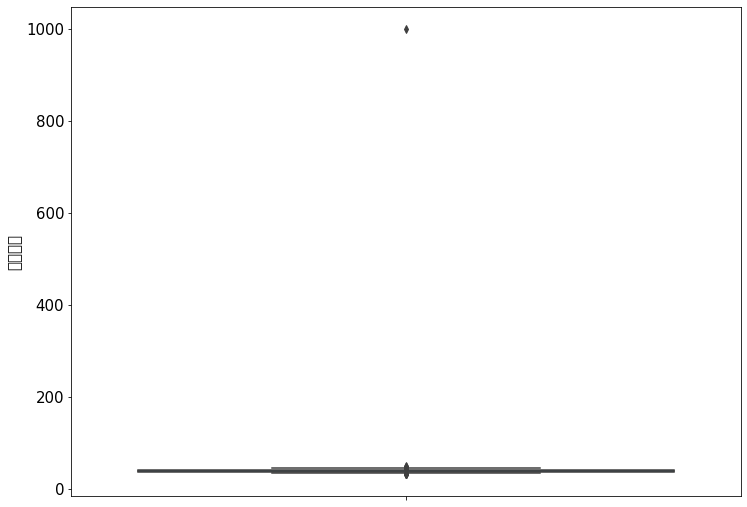

In [46]:
sns.boxplot(data = dt_2020_df, y = '어깨너비')

In [47]:
dt_2020_df[['어깨너비']].sort_values(by='어깨너비', ascending=False)

,어깨너비
884,999.9
2057,49.5
123,49.1
1996,49.0
2647,47.5
...,...
757,33.8
1092,33.7
626,33.4
1246,33.2


In [48]:
dt_2020_df.drop([884, 1], axis=0, inplace=True)

In [49]:
dt_2020_df = dt_2020_df.reset_index().iloc[:, 1:]
dt_2020_df

,키,어깨너비,가슴단면,허리단면,엉덩이단면
0,168.5,38.6,49.65,44.25,49.90
1,164.2,39.5,41.95,35.55,44.70
2,158.9,36.6,43.35,36.85,46.40
3,153.1,37.7,45.10,40.80,45.45
4,153.8,39.4,43.75,38.50,45.65
...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10
2767,154.8,40.0,39.45,33.95,43.35
2768,164.5,38.0,47.10,41.45,52.95
2769,163.5,40.5,43.40,37.70,49.40


### * 군집화 함수

In [50]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [51]:
def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [52]:
dt_2020_km = dt_2020_df.copy()

C:\Users\AB350\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\AB350\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\AB350\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\AB350\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Win

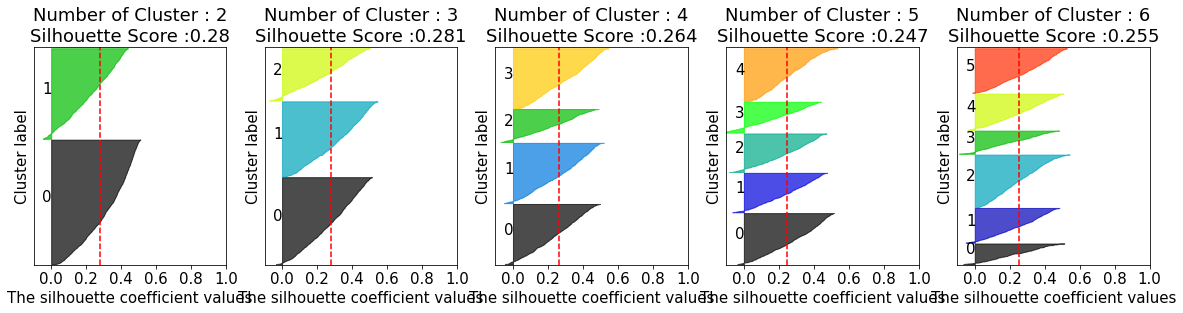

In [53]:
cluster_lists = [2,3,4,5,6]
X_features = dt_2020_km

visualize_silhouette(cluster_lists, X_features)

#### * n_clusters = 6

In [54]:
#n_clusters = 6
clusterer = KMeans(n_clusters = 6, max_iter=500, random_state=0)
cluster_labels = clusterer.fit(dt_2020_km)
cluster_labels.labels_

C:\Users\AB350\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


array([0, 4, 2, ..., 0, 4, 1])

In [55]:
dt_2020_km['cluster=6'] = cluster_labels.labels_
dt_2020_km

,키,어깨너비,가슴단면,허리단면,엉덩이단면,cluster=6
0,168.5,38.6,49.65,44.25,49.90,0
1,164.2,39.5,41.95,35.55,44.70,4
2,158.9,36.6,43.35,36.85,46.40,2
3,153.1,37.7,45.10,40.80,45.45,1
4,153.8,39.4,43.75,38.50,45.65,1
...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,5
2767,154.8,40.0,39.45,33.95,43.35,5
2768,164.5,38.0,47.10,41.45,52.95,0
2769,163.5,40.5,43.40,37.70,49.40,4


각 데이터 포인트의 실루엣 계수<br>
sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds)<br>
(X : X feature 데이터 세트, labels : 군집 레이블 값)<br>

전체 데이터의 실루엣 계수 값의 평균<br>
sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)

In [56]:
#각 데이터 포인트의 실루엣 계수
sil_values = silhouette_samples(np.array(dt_2020_km), dt_2020_km['cluster=6'])

#모든 데이터의 평균 실루엣 계수
sil_avg = silhouette_score(np.array(dt_2020_km), dt_2020_km['cluster=6']).round(3)

print('sil_values:', sil_values)
print('sil_avg:', sil_avg)

sil_values: [0.40130349 0.25008209 0.17208517 ... 0.21351107 0.02669861 0.28882629]
sil_avg: 0.286


#### * n_clusters = 5

In [57]:
#n_clusters = 5
clusterer = KMeans(n_clusters = 5, max_iter=500, random_state=0)
cluster_labels = clusterer.fit(dt_2020_km)
cluster_labels.labels_

C:\Users\AB350\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


array([3, 4, 1, ..., 3, 4, 2])

In [58]:
dt_2020_km['cluster=5'] = cluster_labels.labels_
dt_2020_km

,키,어깨너비,가슴단면,허리단면,엉덩이단면,cluster=6,cluster=5
0,168.5,38.6,49.65,44.25,49.90,0,3
1,164.2,39.5,41.95,35.55,44.70,4,4
2,158.9,36.6,43.35,36.85,46.40,2,1
3,153.1,37.7,45.10,40.80,45.45,1,2
4,153.8,39.4,43.75,38.50,45.65,1,2
...,...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,5,0
2767,154.8,40.0,39.45,33.95,43.35,5,0
2768,164.5,38.0,47.10,41.45,52.95,0,3
2769,163.5,40.5,43.40,37.70,49.40,4,4


각 데이터 포인트의 실루엣 계수<br>
sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds)<br>
(X : X feature 데이터 세트, labels : 군집 레이블 값)<br>

전체 데이터의 실루엣 계수 값의 평균<br>
sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)

In [59]:
#각 데이터 포인트의 실루엣 계수
sil_values = silhouette_samples(np.array(dt_2020_km), dt_2020_km['cluster=5'])

#모든 데이터의 평균 실루엣 계수
sil_avg = silhouette_score(np.array(dt_2020_km), dt_2020_km['cluster=5']).round(3)

print('sil_values:', sil_values)
print('sil_avg:', sil_avg)

sil_values: [ 1.72920696e-01  2.83550295e-01  1.53035285e-01 ... -1.49272066e-04
  1.04492913e-01  3.00883547e-01]
sil_avg: 0.289


#### * n_clusters = 4

In [60]:
#n_clusters = 4
clusterer = KMeans(n_clusters = 4, max_iter=500, random_state=0)
cluster_labels = clusterer.fit(dt_2020_km)
cluster_labels.labels_

C:\Users\AB350\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


array([1, 2, 0, ..., 1, 2, 3])

In [61]:
dt_2020_km['cluster=4'] = cluster_labels.labels_
dt_2020_km

,키,어깨너비,가슴단면,허리단면,엉덩이단면,cluster=6,cluster=5,cluster=4
0,168.5,38.6,49.65,44.25,49.90,0,3,1
1,164.2,39.5,41.95,35.55,44.70,4,4,2
2,158.9,36.6,43.35,36.85,46.40,2,1,0
3,153.1,37.7,45.10,40.80,45.45,1,2,3
4,153.8,39.4,43.75,38.50,45.65,1,2,3
...,...,...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,5,0,0
2767,154.8,40.0,39.45,33.95,43.35,5,0,0
2768,164.5,38.0,47.10,41.45,52.95,0,3,1
2769,163.5,40.5,43.40,37.70,49.40,4,4,2


In [62]:
#각 데이터 포인트의 실루엣 계수
sil_values = silhouette_samples(np.array(dt_2020_km), dt_2020_km['cluster=4'])

#모든 데이터의 평균 실루엣 계수
sil_avg = silhouette_score(np.array(dt_2020_km), dt_2020_km['cluster=4']).round(3)

print('sil_values:', sil_values)
print('sil_avg:', sil_avg)

sil_values: [0.16378952 0.25359344 0.19733647 ... 0.13008229 0.40422279 0.48426541]
sil_avg: 0.301


### * 군집화 한 결과로 데이터 나누기

#### cluster=6

In [63]:
dt_2020_km.groupby('cluster=6')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].mean().round(2)

,키,어깨너비,가슴단면,허리단면,엉덩이단면
cluster=6,,,,,
0,165.64,42.18,48.46,43.65,51.58
1,152.21,38.60,44.39,39.83,45.69
2,159.79,39.83,44.72,39.12,47.31
3,156.84,40.84,49.22,46.31,50.49
4,166.75,40.71,42.97,35.99,46.77
5,158.12,38.68,40.98,33.90,44.26


In [64]:
dt_2020_km['cluster=6'].value_counts()

2    687
5    583
4    474
1    455
3    303
0    269
Name: cluster=6, dtype: int64

0 : 5-6-5-6-6 => 28/5.6/6 (269, XL)<br>
1 : 1-1-3-4-2 => 11/2.2/2 (455, S)<br>
2 : 4-3-4-3-4 => 18/3.6/4 (687, F)<br>
3 : 2-5-6-5-5 => 23/4.6/5 (303, L)<br>
4 : 6-4-2-2-3 => 17/3.4/3 (474, M)<br>
5 : 3-2-1-1-1 => 8/1.6/1 (583, XS)

In [65]:
dt_2020_km.groupby('cluster=6')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].agg([('max', max), ('min', min)])

키         어깨너비         가슴단면          허리단면         엉덩이단면       
             max    min   max   min    max    min    max    min    max    min
cluster=6                                                                    
0          174.4  160.6  49.1  37.8  58.00  44.25  55.90  38.00  68.45  46.05
1          156.6  140.0  44.3  33.0  49.40  36.30  49.05  30.80  52.50  37.75
2          164.8  155.3  49.5  33.2  49.25  33.20  44.70  34.05  53.90  42.75
3          164.3  146.2  46.0  34.9  58.40  44.40  58.90  40.25  60.25  44.25
4          181.0  161.6  49.0  35.4  48.00  37.70  42.25  30.35  53.55  41.20
5          164.9  148.5  44.0  33.4  44.80  35.95  39.55  28.60  49.65  37.50

In [66]:
dt_2020_km

,키,어깨너비,가슴단면,허리단면,엉덩이단면,cluster=6,cluster=5,cluster=4
0,168.5,38.6,49.65,44.25,49.90,0,3,1
1,164.2,39.5,41.95,35.55,44.70,4,4,2
2,158.9,36.6,43.35,36.85,46.40,2,1,0
3,153.1,37.7,45.10,40.80,45.45,1,2,3
4,153.8,39.4,43.75,38.50,45.65,1,2,3
...,...,...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,5,0,0
2767,154.8,40.0,39.45,33.95,43.35,5,0,0
2768,164.5,38.0,47.10,41.45,52.95,0,3,1
2769,163.5,40.5,43.40,37.70,49.40,4,4,2


### * 0 -> XL / 1 -> S / 2 -> Free / 3 -> L / 4 -> M / 5 -> XS (n_clusters = 6)

0 : 5-6-5-6-6 => 28/5.6/6 (269, XL)<br>
1 : 1-1-3-4-2 => 11/2.2/2 (455, S)<br>
2 : 4-3-4-3-4 => 18/3.6/4 (687, F)<br>
3 : 2-5-6-5-5 => 23/4.6/5 (303, L)<br>
4 : 6-4-2-2-3 => 17/3.4/3 (474, M)<br>
5 : 3-2-1-1-1 => 8/1.6/1 (583, XS)

In [69]:
dt_2020_km['size(6)'] = np.random.randint(2771)
size_li = []

for i in range(2771):
    if dt_2020_km['cluster=6'][i] == 0:
        size_li.append('XL')
        
    elif dt_2020_km['cluster=6'][i] == 1:
        size_li.append('S')
        
    elif dt_2020_km['cluster=6'][i] == 2:
        size_li.append('Free')
        
    elif dt_2020_km['cluster=6'][i] == 3:
        size_li.append('L')
        
    elif dt_2020_km['cluster=6'][i] == 4:
        size_li.append('M')
        
    else:
        size_li.append('XS')
        
#print(size_lst)
#print()

dt_2020_km['size(6)'] = size_li

dt_2020_km

,키,어깨너비,가슴단면,허리단면,엉덩이단면,cluster=6,cluster=5,cluster=4,size(6)
0,168.5,38.6,49.65,44.25,49.90,0,3,1,XL
1,164.2,39.5,41.95,35.55,44.70,4,4,2,M
2,158.9,36.6,43.35,36.85,46.40,2,1,0,Free
3,153.1,37.7,45.10,40.80,45.45,1,2,3,S
4,153.8,39.4,43.75,38.50,45.65,1,2,3,S
...,...,...,...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,5,0,0,XS
2767,154.8,40.0,39.45,33.95,43.35,5,0,0,XS
2768,164.5,38.0,47.10,41.45,52.95,0,3,1,XL
2769,163.5,40.5,43.40,37.70,49.40,4,4,2,M


0 : 5-6-5-6-6 => 28/5.6/6 (269, XL)<br>
1 : 1-1-3-4-2 => 11/2.2/2 (455, S)<br>
2 : 4-3-4-3-4 => 18/3.6/4 (687, F)<br>
3 : 2-5-6-5-5 => 23/4.6/5 (303, L)<br>
4 : 6-4-2-2-3 => 17/3.4/3 (474, M)<br>
5 : 3-2-1-1-1 => 8/1.6/1 (583, XS)

In [70]:
dt_2020_km['size(6)'].value_counts()

Free    687
XS      583
M       474
S       455
L       303
XL      269
Name: size(6), dtype: int64

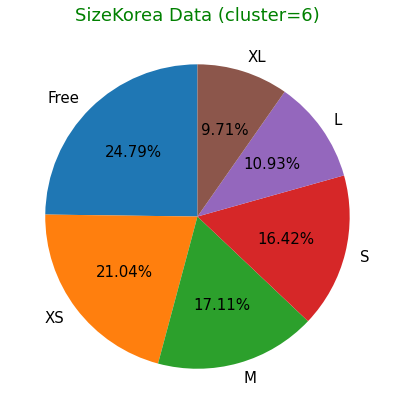

In [71]:
plt.figure(figsize=(7,7))

# pie chart 만들기(차트 띄우기, labels 달기, 각 조정, 그림자, 값 소숫점 표시)
plt.pie(dt_2020_km['size(6)'].value_counts(), labels=('Free', 'XS', 'M', 'S', 'L', 'XL'), startangle=90, autopct='%.2f%%')

# 라벨, 타이틀 달기
plt.title('SizeKorea Data (cluster=6)', fontsize=18, color='g')

#plt.legend(['M','L', 'S', 'XL'], loc='upper right')

plt.rc('font', size=15)

plt.show()

#### cluster=5

In [72]:
dt_2020_km.groupby('cluster=5')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].mean().round(2)

,키,어깨너비,가슴단면,허리단면,엉덩이단면
cluster=5,,,,,
0,158.22,38.70,40.98,33.90,44.26
1,159.89,39.93,44.84,39.24,47.42
2,152.38,38.76,44.76,40.50,46.02
3,161.36,41.64,49.42,45.65,51.59
4,167.00,40.81,43.27,36.39,47.07


In [73]:
dt_2020_km['cluster=5'].value_counts()

1    718
0    595
2    522
4    499
3    437
Name: cluster=5, dtype: int64

In [74]:
dt_2020_km.groupby('cluster=5')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].agg([('max', max), ('min', min)])

키         어깨너비         가슴단면          허리단면         엉덩이단면       
             max    min   max   min    max    min    max    min    max    min
cluster=5                                                                    
0          165.5  148.5  44.0  33.4  44.80  35.95  39.55  28.60  49.65  37.50
1          165.8  155.4  49.5  33.2  49.25  33.20  45.30  34.05  53.90  42.75
2          157.3  140.0  44.4  33.0  52.35  36.30  50.60  30.80  55.05  37.75
3          174.4  149.7  49.1  36.5  58.40  44.25  58.90  39.60  68.45  44.70
4          181.0  161.6  49.0  35.4  49.05  37.70  43.50  30.55  54.30  41.60

#### cluster=4

In [75]:
dt_2020_km.groupby('cluster=4')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].mean().round(2)

,키,어깨너비,가슴단면,허리단면,엉덩이단면
cluster=4,,,,,
0,158.32,38.74,41.22,34.21,44.44
1,161.48,41.56,49.07,45.16,51.36
2,165.58,40.67,43.67,37.01,47.27
3,154.87,39.19,44.95,40.32,46.57


In [76]:
dt_2020_km['cluster=4'].value_counts()

3    894
2    712
0    677
1    488
Name: cluster=4, dtype: int64

0 : 2-1-1-1-1 => 6/1.2/1 (677, S)<br>
1 : 3-4-4-4-4 => 19/3.8/4 (488, XL)<br>
2 : 4-3-2-2-3 => 14/2.8/3 (712, L)<br>
3 : 1-2-3-3-2 => 11/2.2/2 (894, M)

In [77]:
dt_2020_km.groupby('cluster=4')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].agg([('max', max), ('min', min)])

키         어깨너비         가슴단면          허리단면         엉덩이단면       
             max    min   max   min    max    min    max    min    max    min
cluster=4                                                                    
0          165.5  143.8  44.5  33.4  45.85  35.95  39.55  28.60  49.70  37.50
1          174.4  149.7  49.1  36.5  58.40  44.15  58.90  38.65  68.45  44.95
2          181.0  159.8  49.5  35.4  49.05  37.70  43.50  30.55  54.30  41.60
3          162.0  140.0  47.5  33.0  52.35  33.20  50.60  32.90  55.05  39.95

In [78]:
dt_2020_km

,키,어깨너비,가슴단면,허리단면,엉덩이단면,cluster=6,cluster=5,cluster=4,size(6)
0,168.5,38.6,49.65,44.25,49.90,0,3,1,XL
1,164.2,39.5,41.95,35.55,44.70,4,4,2,M
2,158.9,36.6,43.35,36.85,46.40,2,1,0,Free
3,153.1,37.7,45.10,40.80,45.45,1,2,3,S
4,153.8,39.4,43.75,38.50,45.65,1,2,3,S
...,...,...,...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,5,0,0,XS
2767,154.8,40.0,39.45,33.95,43.35,5,0,0,XS
2768,164.5,38.0,47.10,41.45,52.95,0,3,1,XL
2769,163.5,40.5,43.40,37.70,49.40,4,4,2,M


### * 0 -> S / 1 -> XL / 2 -> L / 3 -> M (n_clusters = 4)

0 : 2-1-1-1-1 => 6/1.2/1 (677, S)<br>
1 : 3-4-4-4-4 => 19/3.8/4 (488, XL)<br>
2 : 4-3-2-2-3 => 14/2.8/3 (712, L)<br>
3 : 1-2-3-3-2 => 11/2.2/2 (894, M)

In [79]:
dt_2020_km['size(4)'] = np.random.randint(2771)
size_li = []

for i in range(2771):
    if dt_2020_km['cluster=4'][i] == 0:
        size_li.append('S')
        
    elif dt_2020_km['cluster=4'][i] == 1:
        size_li.append('XL')
        
    elif dt_2020_km['cluster=4'][i] == 2:
        size_li.append('L')
        
    else:
        size_li.append('M')
        
#print(size_lst)
#print()

dt_2020_km['size(4)'] = size_li

dt_2020_km

,키,어깨너비,가슴단면,허리단면,엉덩이단면,cluster=6,cluster=5,cluster=4,size(6),size(4)
0,168.5,38.6,49.65,44.25,49.90,0,3,1,XL,XL
1,164.2,39.5,41.95,35.55,44.70,4,4,2,M,L
2,158.9,36.6,43.35,36.85,46.40,2,1,0,Free,S
3,153.1,37.7,45.10,40.80,45.45,1,2,3,S,M
4,153.8,39.4,43.75,38.50,45.65,1,2,3,S,M
...,...,...,...,...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,5,0,0,XS,S
2767,154.8,40.0,39.45,33.95,43.35,5,0,0,XS,S
2768,164.5,38.0,47.10,41.45,52.95,0,3,1,XL,XL
2769,163.5,40.5,43.40,37.70,49.40,4,4,2,M,L


In [80]:
dt_2020_km['size(4)'].value_counts()

M     894
L     712
S     677
XL    488
Name: size(4), dtype: int64

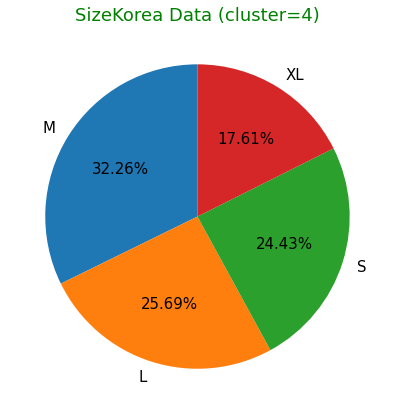

In [81]:
plt.figure(figsize=(7,7))

# pie chart 만들기(차트 띄우기, labels 달기, 각 조정, 그림자, 값 소숫점 표시)
plt.pie(dt_2020_km['size(4)'].value_counts(), labels=('M', 'L', 'S', 'XL'), startangle=90, autopct='%.2f%%')

# 라벨, 타이틀 달기
plt.title('SizeKorea Data (cluster=4)', fontsize=18, color='g')

#plt.legend(['M', 'L', 'S', 'XL'], loc='upper right')

plt.rc('font', size=15)

plt.show()

## 7) 사이즈코리아 데이터 군집화 (평균이동)
features : 키, 어깨너비, 가슴둘레, 허리둘레, 엉덩이둘레<br>
'2020_size_measures.csv' 파일은 20세 이상 성인에 대한 데이터이다<br>
002. 키 , 059. 어깨사이길이 , 041. 가슴둘레 , 045. 허리둘레 , 048. 엉덩이둘레 ,

In [82]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [83]:
dt_2020_ms = dt_2020_df.copy()
dt_2020_ms

,키,어깨너비,가슴단면,허리단면,엉덩이단면
0,168.5,38.6,49.65,44.25,49.90
1,164.2,39.5,41.95,35.55,44.70
2,158.9,36.6,43.35,36.85,46.40
3,153.1,37.7,45.10,40.80,45.45
4,153.8,39.4,43.75,38.50,45.65
...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10
2767,154.8,40.0,39.45,33.95,43.35
2768,164.5,38.0,47.10,41.45,52.95
2769,163.5,40.5,43.40,37.70,49.40


### * 최적의 대역폭 계산

In [ ]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('[bandwidth=0.8] cluster labels 유형:', np.unique(cluster_labels))

meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('[bandwidth=1.0] cluster labels 유형:', np.unique(cluster_labels))

meanshift= MeanShift(bandwidth=1.2)
cluster_labels = meanshift.fit_predict(X)
print('[bandwidth=1.2] cluster labels 유형:', np.unique(cluster_labels))

In [ ]:
bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

In [84]:
bandwidth = estimate_bandwidth(dt_2020_ms)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 8.422


In [85]:
best_bandwidth = estimate_bandwidth(dt_2020_ms)

meanshift = MeanShift(bandwidth=best_bandwidth)

cluster_labels = meanshift.fit_predict(dt_2020_ms)

dt_2020_ms['meanshift_label'] = cluster_labels
print(dt_2020_ms['meanshift_label'].value_counts())

centers = meanshift.cluster_centers_

unique_labels = np.unique(cluster_labels)

0    2730
1      37
2       4
Name: meanshift_label, dtype: int64


In [86]:
dt_2020_ms.groupby('meanshift_label')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].mean().round(2)

,키,어깨너비,가슴단면,허리단면,엉덩이단면
meanshift_label,,,,,
0,159.58,39.82,44.31,38.65,46.94
1,164.50,43.80,53.80,51.11,56.63
2,149.25,38.38,41.26,46.70,49.81


In [87]:
dt_2020_ms.groupby('meanshift_label')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].agg([('max', max), ('min', min)])

키         어깨너비        가슴단면          허리단면        엉덩이단면  \
                   max    min   max   min   max    min    max   min    max   
meanshift_label                                                              
0                181.0  140.0  49.5  33.0  55.5  35.95  53.65  28.6  57.60   
1                173.6  152.5  49.1  40.4  58.4  50.15  58.90  42.3  68.45   
2                156.9  140.4  40.5  36.5  45.9  33.20  50.60  43.5  55.05   

                        
                   min  
meanshift_label         
0                37.50  
1                51.35  
2                45.00

## 8) 사이즈코리아 데이터 군집화 (GMM)
features : 키, 어깨너비, 가슴둘레, 허리둘레, 엉덩이둘레<br>
'2020_size_measures.csv' 파일은 20세 이상 성인에 대한 데이터이다<br>
002. 키 , 059. 어깨사이길이 , 041. 가슴둘레 , 045. 허리둘레 , 048. 엉덩이둘레 ,

In [88]:
from sklearn.mixture import GaussianMixture

### * n_components=6

In [89]:
dt_2020_gm6 = dt_2020_df.copy()
dt_2020_gm6

,키,어깨너비,가슴단면,허리단면,엉덩이단면
0,168.5,38.6,49.65,44.25,49.90
1,164.2,39.5,41.95,35.55,44.70
2,158.9,36.6,43.35,36.85,46.40
3,153.1,37.7,45.10,40.80,45.45
4,153.8,39.4,43.75,38.50,45.65
...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10
2767,154.8,40.0,39.45,33.95,43.35
2768,164.5,38.0,47.10,41.45,52.95
2769,163.5,40.5,43.40,37.70,49.40


In [90]:
# gmm으로 군집화
gmm = GaussianMixture(n_components=6, random_state=0).fit(dt_2020_gm6)
gmm_cluster_labels = gmm.predict(dt_2020_gm6)

# 클러스터링 결과 저장
dt_2020_gm6['gmm_cluster=6'] = gmm_cluster_labels

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인
dt_2020_gm6['gmm_cluster=6'].value_counts()

C:\Users\AB350\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


1    691
3    686
5    461
4    447
2    277
0    209
Name: gmm_cluster=6, dtype: int64

In [91]:
dt_2020_gm6.groupby('gmm_cluster=6')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].mean().round(2)

,키,어깨너비,가슴단면,허리단면,엉덩이단면
gmm_cluster=6,,,,,
0,155.06,40.77,48.69,46.20,49.80
1,159.54,39.75,44.99,39.64,47.58
2,164.22,42.18,49.27,45.00,52.11
3,159.09,38.75,41.26,34.10,44.62
4,152.41,38.47,44.45,39.89,45.63
5,166.87,41.31,43.48,36.57,47.10


0 : 2-4-5-6-5 => 22/4.4/5 (209, L)<br>
1 : 4-3-4-3-4 => 18/3.6/3 (691, M)<br>
2 : 5-6-6-5-6 => 28/5.6/6 (277, XL)<br>
3 : 3-2-1-1-1 => 8/1.6/1 (686, XS)<br>
4 : 1-1-3-4-2 => 11/2.2/2 (447, S)<br>
5 : 6-5-2-2-3 => 18/3.6/4 (461, F)

In [92]:
dt_2020_gm6.groupby('gmm_cluster=6')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].agg([('max', max), ('min', min)])

키         어깨너비         가슴단면          허리단면         엉덩이단면  \
                 max    min   max   min    max    min    max    min    max   
gmm_cluster=6                                                                
0              162.4  146.2  44.5  35.5  55.70  33.20  55.35  38.95  60.25   
1              166.2  152.0  44.3  33.2  49.20  40.80  44.85  32.60  52.80   
2              174.4  156.8  49.1  37.0  58.40  41.50  58.90  37.95  68.45   
3              166.0  148.5  43.3  33.8  44.85  35.95  37.75  28.60  48.70   
4              160.5  140.0  42.2  33.0  49.40  36.30  46.75  30.80  50.85   
5              181.0  156.7  49.5  33.4  49.05  36.55  42.70  29.20  51.95   

                      
                 min  
gmm_cluster=6         
0              43.45  
1              42.35  
2              45.80  
3              37.50  
4              37.75  
5              40.55

### * 0 -> L / 1 -> M / 2 -> XL / 3 -> XS / 4 -> S / 5 -> Free (n_clusters = 6)

In [93]:
dt_2020_gm6

,키,어깨너비,가슴단면,허리단면,엉덩이단면,gmm_cluster=6
0,168.5,38.6,49.65,44.25,49.90,2
1,164.2,39.5,41.95,35.55,44.70,3
2,158.9,36.6,43.35,36.85,46.40,1
3,153.1,37.7,45.10,40.80,45.45,4
4,153.8,39.4,43.75,38.50,45.65,4
...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,3
2767,154.8,40.0,39.45,33.95,43.35,3
2768,164.5,38.0,47.10,41.45,52.95,2
2769,163.5,40.5,43.40,37.70,49.40,1


0 : 2-4-5-6-5 => 22/4.4/5 (209, L)<br>
1 : 4-3-4-3-4 => 18/3.6/3 (691, M)<br>
2 : 5-6-6-5-6 => 28/5.6/6 (277, XL)<br>
3 : 3-2-1-1-1 => 8/1.6/1 (686, XS)<br>
4 : 1-1-3-4-2 => 11/2.2/2 (447, S)<br>
5 : 6-5-2-2-3 => 18/3.6/4 (461, F)

In [95]:
dt_2020_gm6['size(6)'] = np.random.randint(2771)
size_li = []

for i in range(2771):
    if dt_2020_gm6['gmm_cluster=6'][i] == 0:
        size_li.append('L')
        
    elif dt_2020_gm6['gmm_cluster=6'][i] == 1:
        size_li.append('M')
        
    elif dt_2020_gm6['gmm_cluster=6'][i] == 2:
        size_li.append('XL')
        
    elif dt_2020_gm6['gmm_cluster=6'][i] == 3:
        size_li.append('XS')
        
    elif dt_2020_gm6['gmm_cluster=6'][i] == 4:
        size_li.append('S')
        
    else:
        size_li.append('F')
        
#print(size_lst)
#print()

dt_2020_gm6['size(6)'] = size_li

dt_2020_gm6

,키,어깨너비,가슴단면,허리단면,엉덩이단면,gmm_cluster=6,size(6)
0,168.5,38.6,49.65,44.25,49.90,2,XL
1,164.2,39.5,41.95,35.55,44.70,3,XS
2,158.9,36.6,43.35,36.85,46.40,1,M
3,153.1,37.7,45.10,40.80,45.45,4,S
4,153.8,39.4,43.75,38.50,45.65,4,S
...,...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,3,XS
2767,154.8,40.0,39.45,33.95,43.35,3,XS
2768,164.5,38.0,47.10,41.45,52.95,2,XL
2769,163.5,40.5,43.40,37.70,49.40,1,M


In [96]:
dt_2020_gm6['size(6)'].value_counts()

M     691
XS    686
F     461
S     447
XL    277
L     209
Name: size(6), dtype: int64

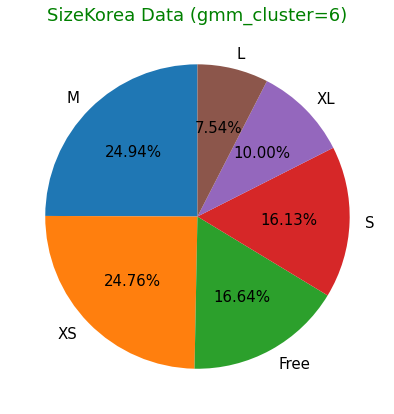

In [97]:
plt.figure(figsize=(7,7))

# pie chart 만들기(차트 띄우기, labels 달기, 각 조정, 그림자, 값 소숫점 표시)
plt.pie(dt_2020_gm6['size(6)'].value_counts(), labels=('M', 'XS', 'Free', 'S', 'XL', 'L'), startangle=90, autopct='%.2f%%')

# 라벨, 타이틀 달기
plt.title('SizeKorea Data (gmm_cluster=6)', fontsize=18, color='g')

#plt.legend(['M','L', 'S', 'XL'], loc='upper right')

plt.rc('font', size=15)

plt.show()

### * n_components=4

In [98]:
dt_2020_gm4 = dt_2020_df.copy()
dt_2020_gm4

,키,어깨너비,가슴단면,허리단면,엉덩이단면
0,168.5,38.6,49.65,44.25,49.90
1,164.2,39.5,41.95,35.55,44.70
2,158.9,36.6,43.35,36.85,46.40
3,153.1,37.7,45.10,40.80,45.45
4,153.8,39.4,43.75,38.50,45.65
...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10
2767,154.8,40.0,39.45,33.95,43.35
2768,164.5,38.0,47.10,41.45,52.95
2769,163.5,40.5,43.40,37.70,49.40


In [99]:
# gmm으로 군집화
gmm = GaussianMixture(n_components=4, random_state=0).fit(dt_2020_gm4)
gmm_cluster_labels = gmm.predict(dt_2020_gm4)

# 클러스터링 결과 저장
dt_2020_gm4['gmm_cluster=4'] = gmm_cluster_labels

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인
dt_2020_gm4['gmm_cluster=4'].value_counts()

C:\Users\AB350\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


0    931
3    794
1    705
2    341
Name: gmm_cluster=4, dtype: int64

In [100]:
dt_2020_gm4.groupby('gmm_cluster=4')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].mean().round(2)

,키,어깨너비,가슴단면,허리단면,엉덩이단면
gmm_cluster=4,,,,,
0,155.74,39.31,45.28,40.94,46.65
1,165.34,41.06,44.12,37.46,47.78
2,160.78,41.79,49.62,46.08,52.33
3,158.62,38.66,41.50,34.45,44.68


0 : 1-2-3-3-2 => 2 (931, M)<br>
1 : 4-3-2-2-3 => 3 (705, L)<br>
2 : 3-4-4-4-4 => 4 (341, XL)<br>
3 : 2-1-1-1-1 => 1 (794, S)

In [101]:
dt_2020_gm4.groupby('gmm_cluster=4')[['키', '어깨너비', '가슴단면', '허리단면', '엉덩이단면']].agg([('max', max), ('min', min)])

키         어깨너비         가슴단면         허리단면         엉덩이단면  \
                 max    min   max   min    max    min   max    min    max   
gmm_cluster=4                                                               
0              168.9  140.0  45.3  33.0  50.10  36.30  48.6  32.00  51.45   
1              181.0  156.5  49.5  33.8  49.75  37.80  44.9  30.35  53.00   
2              174.4  140.4  49.1  35.5  58.40  33.20  58.9  37.00  68.45   
3              167.6  144.4  43.3  33.4  45.60  35.95  38.7  28.60  49.70   

                      
                 min  
gmm_cluster=4         
0              37.75  
1              41.20  
2              45.00  
3              37.50

### * 0 -> M / 1 -> L / 2 -> XL / 3 -> S (n_clusters = 4)

In [102]:
dt_2020_gm4

,키,어깨너비,가슴단면,허리단면,엉덩이단면,gmm_cluster=4
0,168.5,38.6,49.65,44.25,49.90,1
1,164.2,39.5,41.95,35.55,44.70,3
2,158.9,36.6,43.35,36.85,46.40,3
3,153.1,37.7,45.10,40.80,45.45,0
4,153.8,39.4,43.75,38.50,45.65,0
...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,3
2767,154.8,40.0,39.45,33.95,43.35,3
2768,164.5,38.0,47.10,41.45,52.95,1
2769,163.5,40.5,43.40,37.70,49.40,1


In [103]:
dt_2020_gm4['size(4)'] = np.random.randint(2771)
size_li = []

for i in range(2771):
    if dt_2020_gm4['gmm_cluster=4'][i] == 0:
        size_li.append('M')
        
    elif dt_2020_gm4['gmm_cluster=4'][i] == 1:
        size_li.append('L')
        
    elif dt_2020_gm4['gmm_cluster=4'][i] == 2:
        size_li.append('XL')
        
    else:
        size_li.append('S')
        
#print(size_lst)
#print()

dt_2020_gm4['size(4)'] = size_li

dt_2020_gm4

,키,어깨너비,가슴단면,허리단면,엉덩이단면,gmm_cluster=4,size(4)
0,168.5,38.6,49.65,44.25,49.90,1,L
1,164.2,39.5,41.95,35.55,44.70,3,S
2,158.9,36.6,43.35,36.85,46.40,3,S
3,153.1,37.7,45.10,40.80,45.45,0,M
4,153.8,39.4,43.75,38.50,45.65,0,M
...,...,...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10,3,S
2767,154.8,40.0,39.45,33.95,43.35,3,S
2768,164.5,38.0,47.10,41.45,52.95,1,L
2769,163.5,40.5,43.40,37.70,49.40,1,L


In [104]:
dt_2020_gm4['size(4)'].value_counts()

M     931
S     794
L     705
XL    341
Name: size(4), dtype: int64

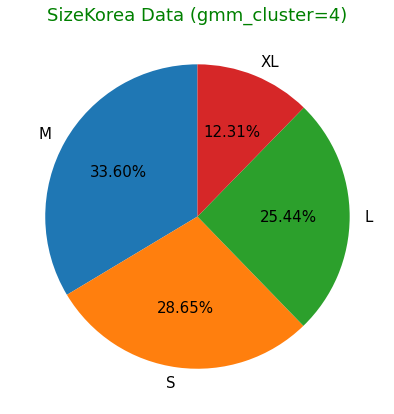

In [105]:
plt.figure(figsize=(7,7))

# pie chart 만들기(차트 띄우기, labels 달기, 각 조정, 그림자, 값 소숫점 표시)
plt.pie(dt_2020_gm4['size(4)'].value_counts(), labels=('M', 'S', 'L', 'XL'), startangle=90, autopct='%.2f%%')

# 라벨, 타이틀 달기
plt.title('SizeKorea Data (gmm_cluster=4)', fontsize=18, color='g')

#plt.legend(['M', 'L', 'S', 'XL'], loc='upper right')

plt.rc('font', size=15)

plt.show()

## 9) 사이즈코리아 데이터 군집화 (DBSCAN)
features : 키, 어깨너비, 가슴둘레, 허리둘레, 엉덩이둘레<br>
'2020_size_measures.csv' 파일은 20세 이상 성인에 대한 데이터이다<br>
002. 키 , 059. 어깨사이길이 , 041. 가슴둘레 , 045. 허리둘레 , 048. 엉덩이둘레 ,

In [316]:
from sklearn.cluster import DBSCAN

In [411]:
dt_2020_db = dt_2020_df.copy()
dt_2020_db

,키,어깨사이길이,가슴둘레/2,허리둘레/2,엉덩이둘레/2
0,168.5,38.6,49.65,44.25,49.90
1,164.2,39.5,41.95,35.55,44.70
2,158.9,36.6,43.35,36.85,46.40
3,153.1,37.7,45.10,40.80,45.45
4,153.8,39.4,43.75,38.50,45.65
...,...,...,...,...,...
2766,159.7,35.8,41.60,35.95,46.10
2767,154.8,40.0,39.45,33.95,43.35
2768,164.5,38.0,47.10,41.45,52.95
2769,163.5,40.5,43.40,37.70,49.40


In [412]:
# 주변 영역 반경 = 0.6, 최소 데이터 개수 = 8
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(dt_2020_db)

# 군집화된 레이블 값 저장
dt_2020_db['dbscan_cluster'] = dbscan_labels

# 예측 비교
dt_2020_db['dbscan_cluster'].value_counts()

-1    2771
Name: dbscan_cluster, dtype: int64

In [413]:
# 주변 영역 반경 = 0.8, 최소 데이터 개수 = 8
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(dt_2020_db)

# 군집화된 레이블 값 저장
dt_2020_db['dbscan_cluster'] = dbscan_labels

# 예측 비교
dt_2020_db['dbscan_cluster'].value_counts()

-1    2771
Name: dbscan_cluster, dtype: int64

In [414]:
# 주변 영역 반경 = 0.3, 최소 데이터 개수 = 3
dbscan = DBSCAN(eps=0.3, min_samples=3, metric='euclidean')
dbscan_labels = dbscan.fit_predict(dt_2020_db)

# 군집화된 레이블 값 저장
dt_2020_db['dbscan_cluster'] = dbscan_labels

# 예측 비교
dt_2020_db['dbscan_cluster'].value_counts()

-1    2771
Name: dbscan_cluster, dtype: int64